# 안녕하세요:)

## '서울시 생활정보 기반 대중교통 수요 분석 ' 과정에 오신 여러분을 환영합니다.
* 본 과정에서는 서울시 생활정보 데이터를 기반으로 데이터 분석을 시도하고 주어진 문제를 해결할 것입니다.


* 우리는 공공 데이터를 활용해 버스노선 관련 인사이트를 도출하여 유용한 정책을 세우는데 도움을 주고자 합니다

## ▣ 우리가 풀어야 하는 문제는 무엇인가요?

* 제공 데이터
    - 구 별 유동인구 데이터
    - 구 별 주민 등록 데이터
    - 구 별 업종 등록 정보
    - 버스 승하차 및 운행 노선 데이터 

### 위 제공 데이터를 분석하여 버스 노선 추가 필요 대상 지역(구 단위)을 선정합니다

# 이 4개의 데이터들을 어떻게 합칠까요?

In [1]:
import pandas as pd

In [2]:
standard = pd.DataFrame({'도착 시군구 코드': [11010, 11020, 11030, 11040, 11050, 11060, 11070, 11080, 11090, 11100, 11110, 11120, 11130, 11140, 11150, 11160, 11170, 11180, 11190, 11200, 11210, 11220, 11230, 11240, 11250],
                         '자치구' :['종로구','중구','용산구','성동구','광진구','동대문구','중랑구','성북구','강북구','도봉구','노원구','은평구','서대문구','마포구','양천구','강서구','구로구','금천구','영등포구','동작구','관악구','서초구','강남구','송파구','강동구']})

In [3]:
standard

,도착 시군구 코드,자치구
0,11010,종로구
1,11020,중구
2,11030,용산구
3,11040,성동구
4,11050,광진구
5,11060,동대문구
6,11070,중랑구
7,11080,성북구
8,11090,강북구
9,11100,도봉구


In [4]:
# 버스 정류장 데이터 - df_seoul_bus_station
# 유동인구 데이터 - df_seoul_moving
# 구별 상권 데이터 - df_seoul_business
# 구별 등록 인구 데이터 - df_seoul_people

In [5]:
df_seoul_bus_station = pd.read_csv('df_seoul_bus_station.csv', sep=",", encoding = 'UTF-8')
df_seoul_moving = pd.read_csv('df_seoul_moving.csv', sep=",", encoding = 'UTF-8')
df_seoul_business = pd.read_csv('df_seoul_business.csv', sep=",", encoding = 'UTF-8')
df_seoul_people = pd.read_csv('df_seoul_people.csv', sep=",", encoding = 'UTF-8')

In [6]:
df_seoul_bus_station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   자치구      25 non-null     object 
 1   정류장수     25 non-null     int64  
 2   노선수      25 non-null     int64  
 3   승차총승객수   25 non-null     int64  
 4   하차총승객수   25 non-null     int64  
 5   승차평균승객수  25 non-null     float64
 6   하차평균승객수  25 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 1.5+ KB


In [7]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   도착 시군구 코드  25 non-null     object 
 1   각구별평균이동시간  25 non-null     float64
 2   각구별이동시간의합  25 non-null     int64  
 3   각구별평균이동인구  25 non-null     float64
 4   각구별이동인구의합  25 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ KB


In [8]:
# 아래에 실습코드를 작성하고 결과를 확인합니다.
df_seoul_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   자치구                   25 non-null     object
 1   택시운송업 사업체수            25 non-null     int64 
 2   택시운송업 종사자수            25 non-null     int64 
 3   한식 일반 음식점업 사업체수       25 non-null     int64 
 4   한식 일반 음식점업 종사자수       25 non-null     int64 
 5   용달 화물자동차 운송업 사업체수     25 non-null     int64 
 6   용달 화물자동차 운송업 종사자수     25 non-null     int64 
 7   부동산 중개 및 대리업 사업체수     25 non-null     int64 
 8   부동산 중개 및 대리업 종사자수     25 non-null     int64 
 9   두발미용업 사업체수            25 non-null     int64 
 10  두발미용업 종사자수            25 non-null     int64 
 11  커피전문점 사업체수            25 non-null     int64 
 12  커피전문점 종사자수            25 non-null     int64 
 13  남녀용 겉옷 및 셔츠 도매업 사업체수  25 non-null     int64 
 14  남녀용 겉옷 및 셔츠 도매업 종사자수  25 non-null     int64 
 15  기타주점업 사업체수            25 non-null     int6

In [9]:
df_seoul_people.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   자치구       25 non-null     object
 1   총인구       25 non-null     int64 
 2   총남자수      25 non-null     int64 
 3   총여자수      25 non-null     int64 
 4   총한국인수     25 non-null     int64 
 5   한국남자수     25 non-null     int64 
 6   한국여자수     25 non-null     int64 
 7   총외국인수     25 non-null     int64 
 8   외국남자수     25 non-null     int64 
 9   외국여자수     25 non-null     int64 
 10  65세이상고령자  25 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 2.3+ KB


In [10]:
df_seoul_moving.rename(columns = {'도착 시군구 코드':'자치구'},inplace=True)

In [11]:
df_seoul_moving.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   자치구        25 non-null     object 
 1   각구별평균이동시간  25 non-null     float64
 2   각구별이동시간의합  25 non-null     int64  
 3   각구별평균이동인구  25 non-null     float64
 4   각구별이동인구의합  25 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 1.1+ KB


In [12]:
df = df_seoul_people
df = pd.merge(df,df_seoul_business,how='inner', on='자치구')
df = pd.merge(df,df_seoul_bus_station,how='inner', on='자치구')
df = pd.merge(df,df_seoul_moving,how='inner', on='자치구')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   자치구                   25 non-null     object 
 1   총인구                   25 non-null     int64  
 2   총남자수                  25 non-null     int64  
 3   총여자수                  25 non-null     int64  
 4   총한국인수                 25 non-null     int64  
 5   한국남자수                 25 non-null     int64  
 6   한국여자수                 25 non-null     int64  
 7   총외국인수                 25 non-null     int64  
 8   외국남자수                 25 non-null     int64  
 9   외국여자수                 25 non-null     int64  
 10  65세이상고령자              25 non-null     int64  
 11  택시운송업 사업체수            25 non-null     int64  
 12  택시운송업 종사자수            25 non-null     int64  
 13  한식 일반 음식점업 사업체수       25 non-null     int64  
 14  한식 일반 음식점업 종사자수       25 non-null     int64  
 15  용달 화물자동차 운송업 사업체수     25 

---

In [14]:
df.head(25)

,자치구,총인구,총남자수,총여자수,총한국인수,한국남자수,한국여자수,총외국인수,외국남자수,외국여자수,...,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,각구별평균이동시간,각구별이동시간의합,각구별평균이동인구,각구별이동인구의합
0,중구,131450,63869,67581,122173,59448,62725,9277,4421,4856,...,178,103,3776675,3598932,121.020124,115.324511,21.012462,9306020,44.484487,19701334.11
1,종로구,153684,74018,79666,144275,69911,74364,9409,4107,5302,...,349,106,5468935,5205394,131.889620,125.534028,21.349599,9356120,44.203753,19371587.60
2,용산구,236518,114571,121947,222169,106735,115434,14349,7836,6513,...,323,67,4189977,4086474,137.891694,134.485421,21.364786,8514380,36.868280,14692894.37
3,금천구,244901,123959,120942,231098,116568,114530,13803,7391,6412,...,345,58,3776658,3581930,123.098370,116.751304,23.998944,6362000,30.547876,8098089.24
4,성동구,291609,141662,149947,285073,138847,146226,6536,2815,3721,...,435,58,2807280,2746738,96.377369,94.298888,21.740324,8887140,42.650995,17435129.45
5,강북구,300824,145934,154890,297384,144643,152741,3440,1291,2149,...,413,67,4825181,4671783,133.020373,128.791504,23.811274,7649610,39.083595,12555995.80
6,서대문구,317075,149805,167270,305866,145958,159908,11209,3847,7362,...,456,107,5863499,5796960,109.914502,108.667192,22.026816,8465390,42.378435,16286964.89
7,도봉구,318100,154440,163660,316098,153716,162382,2002,724,1278,...,359,46,3304305,3211421,106.859356,103.855540,24.489976,6995880,37.834944,10808043.75
8,동대문구,352592,172318,180274,337982,166823,171159,14610,5495,9115,...,306,73,5240565,5115379,131.841430,128.692017,21.673451,8838130,39.906645,16273371.28
9,광진구,353110,169525,183585,340707,164346,176361,12403,5179,7224,...,269,41,2749448,2753411,118.352546,118.523137,22.474283,8625540,46.725608,17933101.49


In [15]:
df.columns

Index(['자치구', '총인구', '총남자수', '총여자수', '총한국인수', '한국남자수', '한국여자수', '총외국인수',
       '외국남자수', '외국여자수', '65세이상고령자', '택시운송업 사업체수', '택시운송업 종사자수',
       '한식 일반 음식점업 사업체수', '한식 일반 음식점업 종사자수', '용달 화물자동차 운송업 사업체수',
       '용달 화물자동차 운송업 종사자수', '부동산 중개 및 대리업 사업체수', '부동산 중개 및 대리업 종사자수',
       '두발미용업 사업체수', '두발미용업 종사자수', '커피전문점 사업체수', '커피전문점 종사자수',
       '남녀용 겉옷 및 셔츠 도매업 사업체수', '남녀용 겉옷 및 셔츠 도매업 종사자수', '기타주점업 사업체수',
       '기타주점업 종사자수', '일반 교과 학원 사업체수', '일반 교과 학원 종사자수', '한식 육류요리 전문점 사업체수',
       '한식 육류요리 전문점 종사자수', '정류장수', '노선수', '승차총승객수', '하차총승객수', '승차평균승객수',
       '하차평균승객수', '각구별평균이동시간', '각구별이동시간의합', '각구별평균이동인구', '각구별이동인구의합'],
      dtype='object')

## 1.가설 수립 
+ 어떤 데이터를 label 데이터로 하실 건가요?

? 정해진게 없나요? - 네 라벨을 개인및 조별로 고민하셔서 라벨데이터를 설정하시면 되겠습니다
? 가설마다 라벨데이터가 달라도 상관없나요? 네 그렇습니다
? 가설은 3개만 해야하나요? 그 이상 하셔도 무방합니다

### 가설을 설정해 봅시다 (인당 최소 3개) - 미니프로젝트 진행의 편의상 가설은 이변량 분석을 염두에 두고 설정해 주세요

* 가설 1

* 가설 2

* 가설 3

## 2.단변량 분석

+ 변수의 비즈니스 의미  

+ 숫자? 범주?  

+ 전처리 사항
   - NaN 존재 여부 및 조치 방안  
   - 가변수화 대상여부  
   
+ 기초통계량

+ 분포  

+ 위 정보로부터 파악한 내용(비즈니스!) 정리  

+ 추가 분석해볼 사항 도출

In [16]:
# 시각화 한글폰트 설정
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('font', family='nanum')
sns.set(font="NanumGothicCoding",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')     

In [17]:
df.corr()

,총인구,총남자수,총여자수,총한국인수,한국남자수,한국여자수,총외국인수,외국남자수,외국여자수,65세이상고령자,...,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,각구별평균이동시간,각구별이동시간의합,각구별평균이동인구,각구별이동인구의합
총인구,1.000000,0.998546,0.998747,0.998965,0.998578,0.997148,-0.220807,-0.206115,-0.225567,0.951353,...,0.566615,-0.281536,0.364433,0.388119,-0.269854,-0.207643,0.638885,0.373570,0.696172,0.528218
총남자수,0.998546,1.000000,0.994596,0.996472,0.998684,0.992248,-0.198175,-0.180570,-0.207338,0.952434,...,0.550032,-0.294351,0.359532,0.384499,-0.255715,-0.192074,0.644669,0.350985,0.681152,0.509600
총여자수,0.998747,0.994596,1.000000,0.998679,0.995879,0.999101,-0.241244,-0.229295,-0.241903,0.947873,...,0.580536,-0.268906,0.368034,0.390470,-0.282278,-0.221558,0.631852,0.393565,0.708305,0.544129
총한국인수,0.998965,0.996472,0.998679,1.000000,0.998782,0.998951,-0.264941,-0.249376,-0.268369,0.953338,...,0.563648,-0.295912,0.354262,0.376908,-0.287016,-0.226520,0.653882,0.371008,0.700912,0.529115
한국남자수,0.998578,0.998684,0.995879,0.998782,1.000000,0.995475,-0.247029,-0.230776,-0.252150,0.955552,...,0.548160,-0.307389,0.350980,0.375110,-0.273929,-0.211520,0.658798,0.350252,0.686288,0.511095
한국여자수,0.997148,0.992248,0.999101,0.998951,0.995475,1.000000,-0.280982,-0.266087,-0.282830,0.949207,...,0.576789,-0.284619,0.356536,0.377756,-0.298532,-0.239943,0.647896,0.389456,0.712950,0.544679
총외국인수,-0.220807,-0.198175,-0.241244,-0.264941,-0.247029,-0.280982,1.000000,0.977692,0.972597,-0.273735,...,-0.074076,0.376667,0.129526,0.146077,0.433584,0.455231,-0.476829,-0.035849,-0.270797,-0.147580
외국남자수,-0.206115,-0.180570,-0.229295,-0.249376,-0.230776,-0.266087,0.977692,1.000000,0.902067,-0.255808,...,-0.077294,0.310637,0.090021,0.100932,0.401952,0.412465,-0.403656,-0.058175,-0.238703,-0.133556
외국여자수,-0.225567,-0.207338,-0.241903,-0.268369,-0.252150,-0.282830,0.972597,0.902067,1.000000,-0.279318,...,-0.066654,0.430132,0.166506,0.188438,0.446009,0.478854,-0.532984,-0.009269,-0.292215,-0.155414
65세이상고령자,0.951353,0.952434,0.947873,0.953338,0.955552,0.949207,-0.273735,-0.255808,-0.279318,1.000000,...,0.554425,-0.334297,0.295889,0.322254,-0.306123,-0.243298,0.712731,0.186226,0.531216,0.336336


In [18]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats

mpl.rc('font', family='Malgun Gothic')

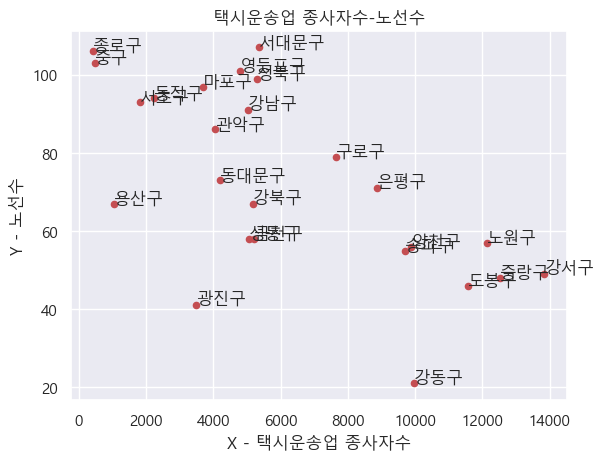

In [19]:
plt.scatter(df['택시운송업 종사자수'], df['노선수'], color = 'r', s = 20)
plt.title("택시운송업 종사자수-노선수")
plt.xlabel('X - 택시운송업 종사자수')
plt.ylabel('Y - 노선수')

for n in range(len(df)): # 행 개수만큼 순회
    row = df.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['택시운송업 종사자수'] # x좌표가 저장된 열
    y = row['노선수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정

plt.show()

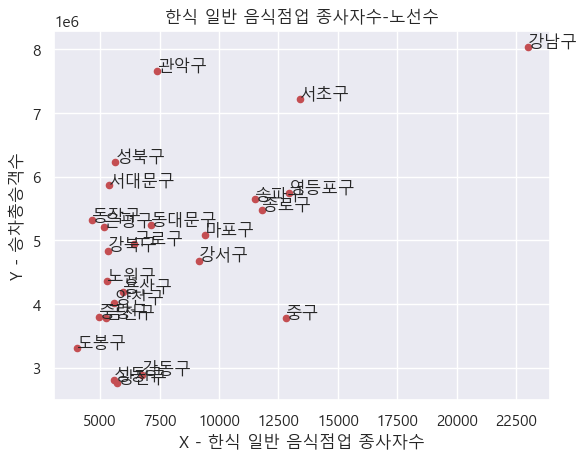

In [20]:
plt.scatter(df['한식 일반 음식점업 종사자수'],df['승차총승객수'], color = 'r', s = 20)
plt.title("한식 일반 음식점업 종사자수-노선수")
plt.xlabel('X - 한식 일반 음식점업 종사자수')
plt.ylabel('Y - 승차총승객수')

for n in range(len(df)): # 행 개수만큼 순회
    row = df.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['한식 일반 음식점업 종사자수'] # x좌표가 저장된 열
    y = row['승차총승객수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정

plt.show()

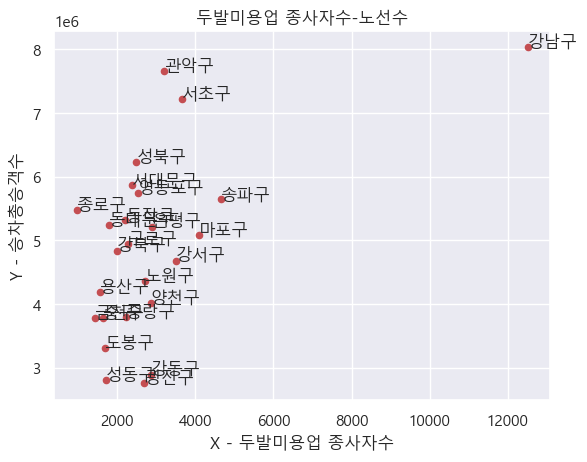

In [21]:
plt.scatter(df['두발미용업 종사자수'],df['승차총승객수'], color = 'r', s = 20)
plt.title("두발미용업 종사자수-노선수")
plt.xlabel('X - 두발미용업 종사자수')
plt.ylabel('Y - 승차총승객수')

for n in range(len(df)): # 행 개수만큼 순회
    row = df.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['두발미용업 종사자수'] # x좌표가 저장된 열
    y = row['승차총승객수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정

plt.show()

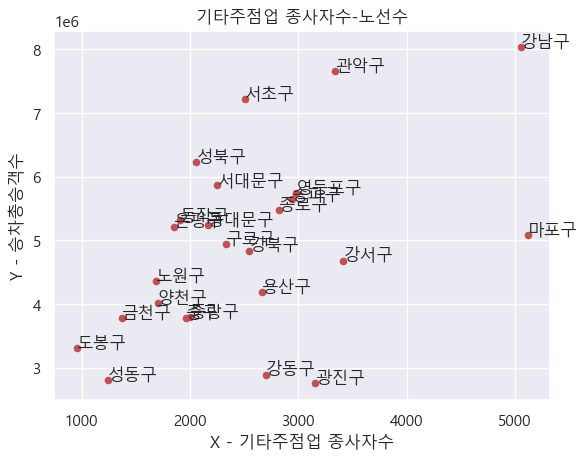

In [22]:
plt.scatter(df['기타주점업 종사자수'],df['승차총승객수'], color = 'r', s = 20)
plt.title("기타주점업 종사자수-노선수")
plt.xlabel('X - 기타주점업 종사자수')
plt.ylabel('Y - 승차총승객수')

for n in range(len(df)): # 행 개수만큼 순회
    row = df.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['기타주점업 종사자수'] # x좌표가 저장된 열
    y = row['승차총승객수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정

plt.show()

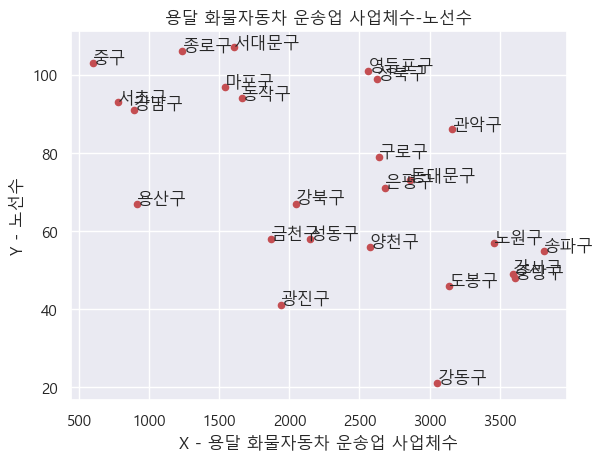

In [23]:
plt.scatter(df['용달 화물자동차 운송업 사업체수'],df['노선수'], color = 'r', s = 20)
plt.title("용달 화물자동차 운송업 사업체수-노선수")
plt.xlabel('X - 용달 화물자동차 운송업 사업체수')
plt.ylabel('Y - 노선수')

for n in range(len(df)): # 행 개수만큼 순회
    row = df.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['용달 화물자동차 운송업 사업체수'] # x좌표가 저장된 열
    y = row['노선수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정

plt.show()

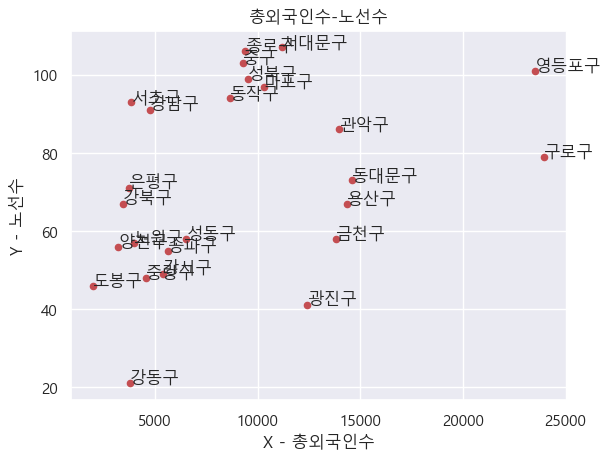

In [24]:
plt.scatter(df['총외국인수'], df['노선수'], color = 'r', s = 20)
plt.title("총외국인수-노선수")
plt.xlabel('X - 총외국인수')
plt.ylabel('Y - 노선수')

for n in range(len(df)): # 행 개수만큼 순회
    row = df.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['총외국인수'] # x좌표가 저장된 열
    y = row['노선수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정

plt.show()

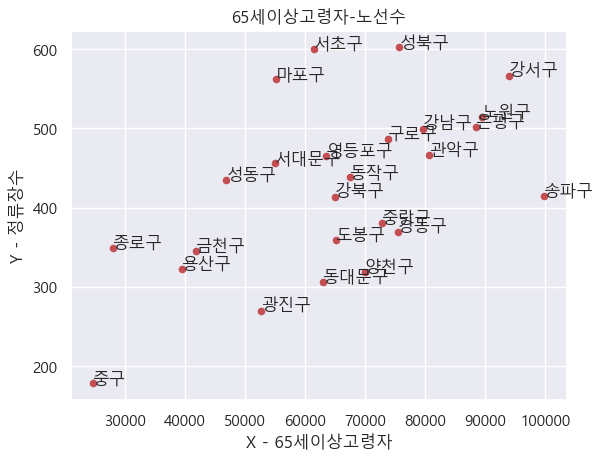

In [25]:
plt.scatter(df['65세이상고령자'],df['정류장수'], color = 'r', s = 20)
plt.title("65세이상고령자-노선수")
plt.xlabel('X - 65세이상고령자')
plt.ylabel('Y - 정류장수')

for n in range(len(df)): # 행 개수만큼 순회
    row = df.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['65세이상고령자'] # x좌표가 저장된 열
    y = row['정류장수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정

plt.show()

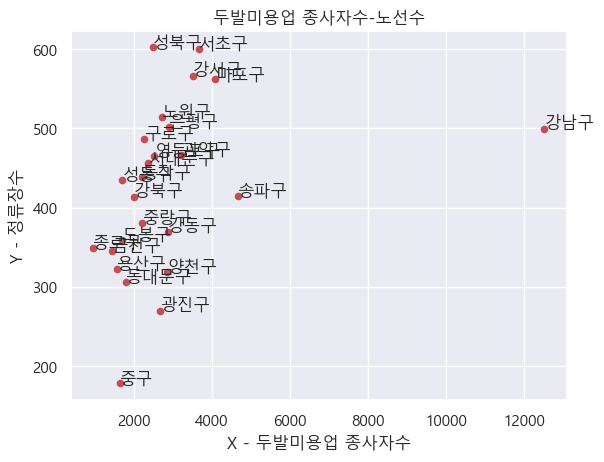

In [26]:
plt.scatter(df['두발미용업 종사자수'],df['정류장수'], color = 'r', s = 20)
plt.title("두발미용업 종사자수-노선수")
plt.xlabel('X - 두발미용업 종사자수')
plt.ylabel('Y - 정류장수')

for n in range(len(df)): # 행 개수만큼 순회
    row = df.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['두발미용업 종사자수'] # x좌표가 저장된 열
    y = row['정류장수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정

plt.show()

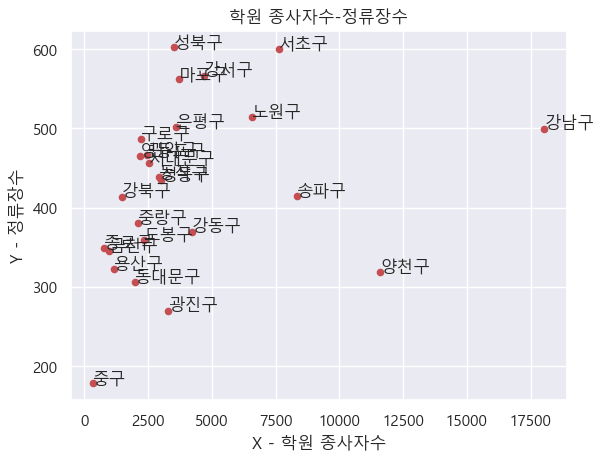

In [27]:
plt.scatter(df['일반 교과 학원 종사자수'],df['정류장수'], color = 'r', s = 20)
plt.title("학원 종사자수-정류장수")
plt.xlabel('X - 학원 종사자수')
plt.ylabel('Y - 정류장수')

for n in range(len(df)): # 행 개수만큼 순회
    row = df.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['일반 교과 학원 종사자수'] # x좌표가 저장된 열
    y = row['정류장수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정

plt.show()

<AxesSubplot:xlabel='자치구', ylabel='총인구'>

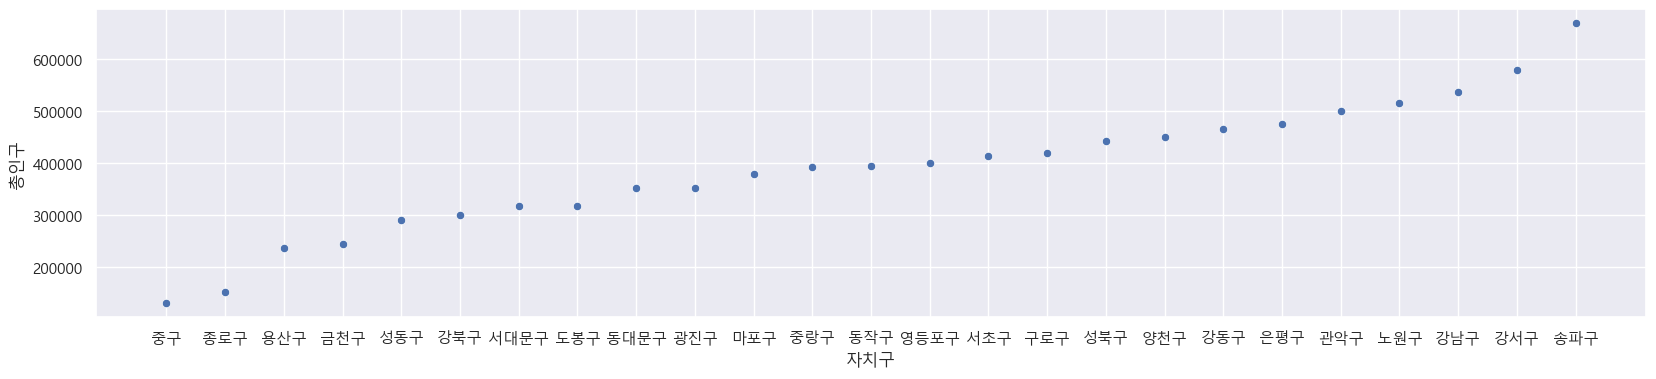

In [28]:
plt.figure(figsize=(20,4))
sns.scatterplot(data=df, x='자치구', y='총인구')

<AxesSubplot:xlabel='자치구', ylabel='노선수'>

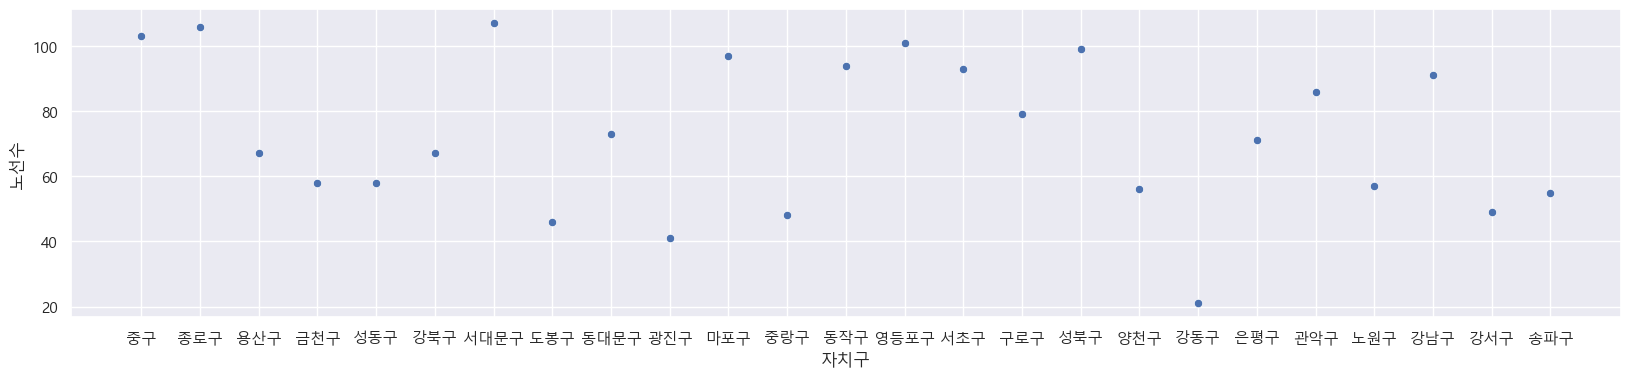

In [29]:
plt.figure(figsize=(20,4))
sns.scatterplot(data=df, x='자치구', y='노선수')

<AxesSubplot:xlabel='자치구', ylabel='정류장수'>

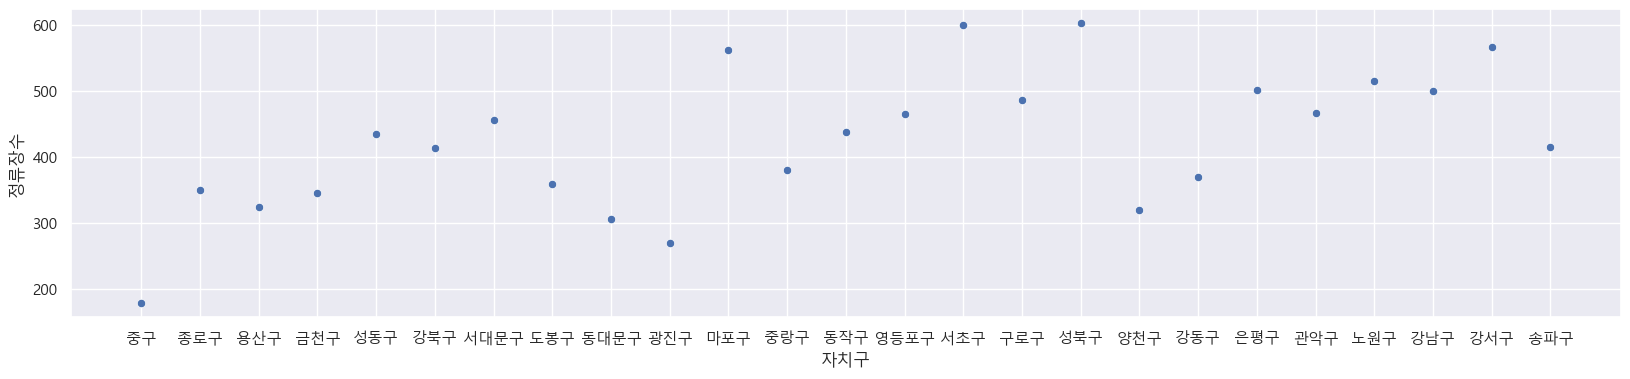

In [30]:
plt.figure(figsize=(20,4))
sns.scatterplot(data=df, x='자치구', y='정류장수')

<Figure size 5000x4000 with 0 Axes>

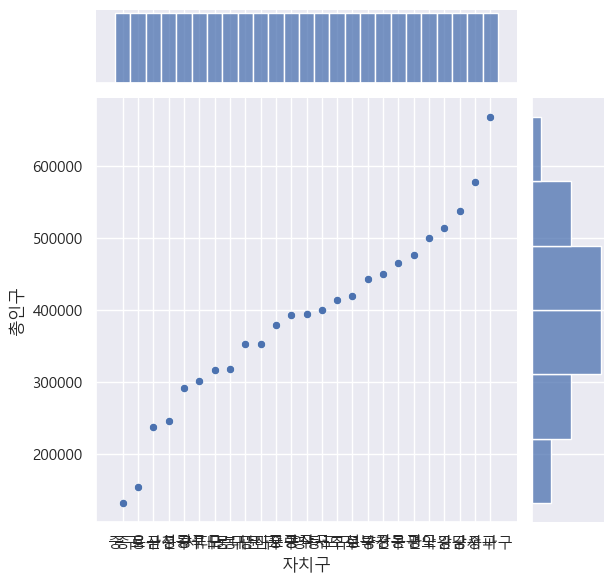

In [31]:
plt.figure(figsize=(50,40))
sns.jointplot(data=df, x='자치구', y='총인구')

In [32]:
#sns.pairplot(df)
heatmap_data = df.corr()

<AxesSubplot:title={'center':'Person Correlation of Features'}>

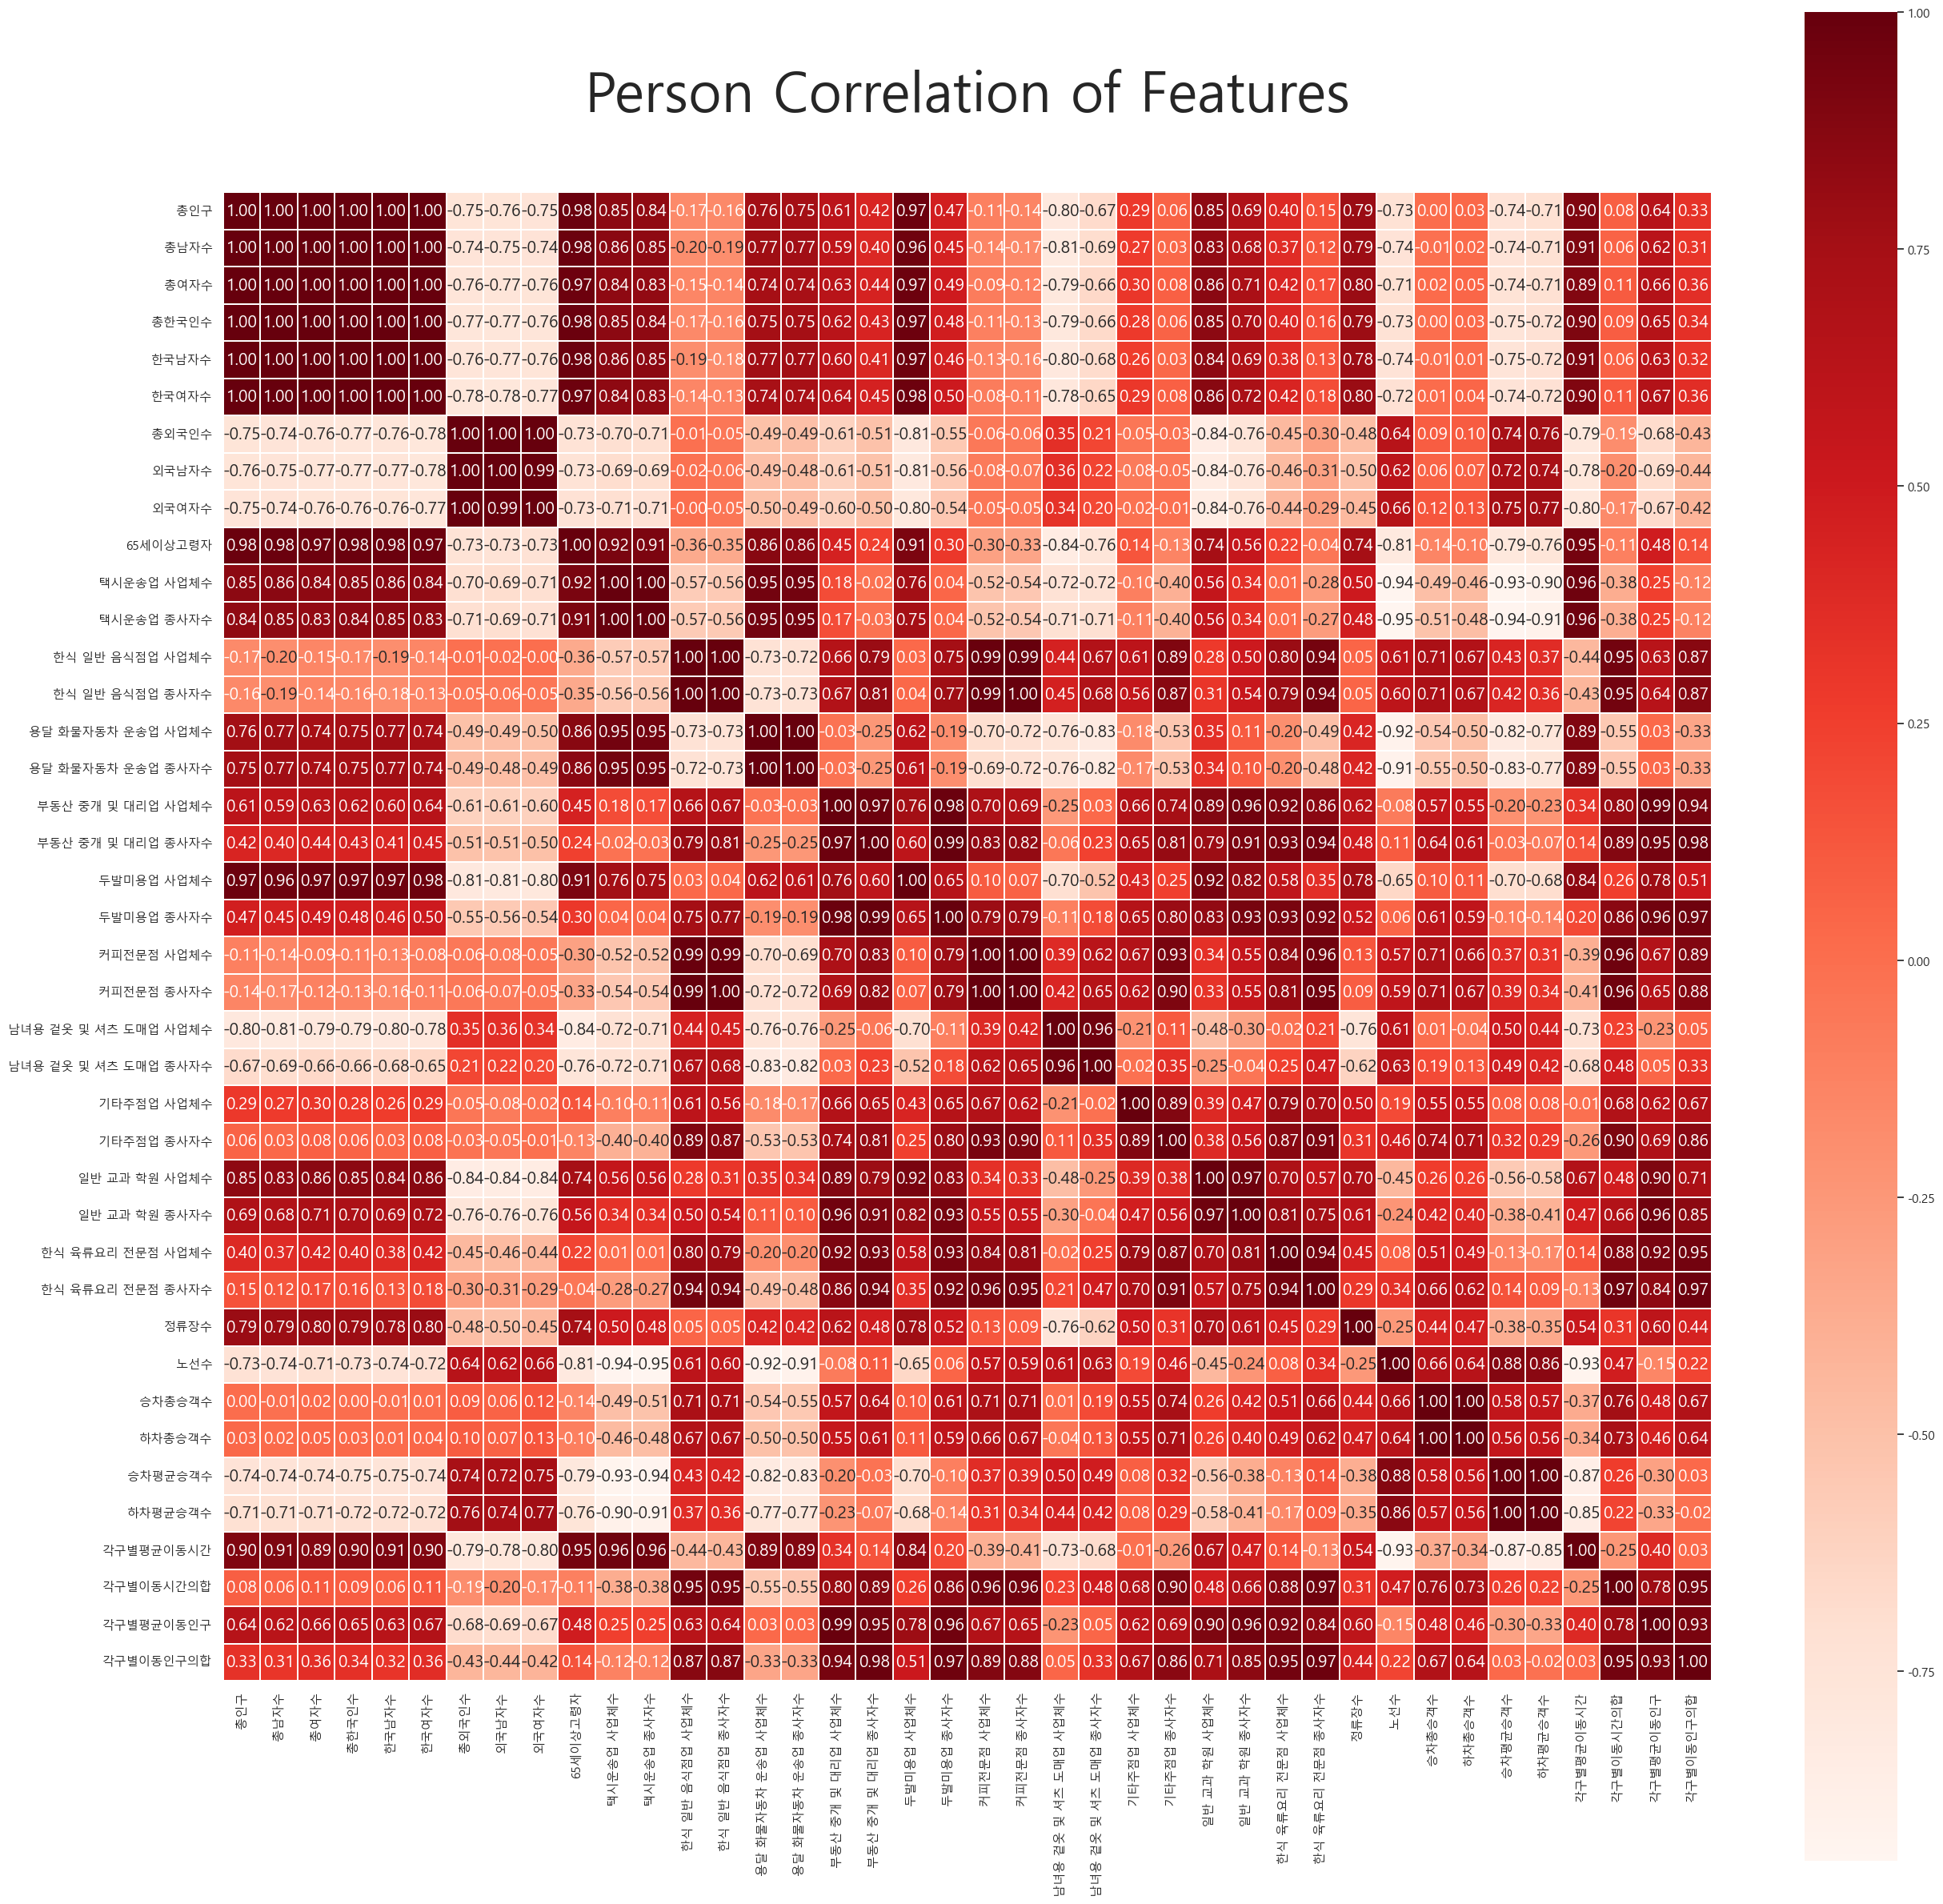

In [33]:
plt.figure(figsize=(30, 30))
plt.title("Person Correlation of Features", y = 1.05, size = 50)
sns.heatmap(heatmap_data.corr(), linewidths = 0.1, vmax = 1.0, fmt = '.2f',
           square = True,cmap='Reds',  linecolor = "white", annot = True, annot_kws = {"size" : 15})

In [34]:
stats.pearsonr(df['정류장수'],df['택시운송업 종사자수'])

(0.21566963557672325, 0.3004870348387421)

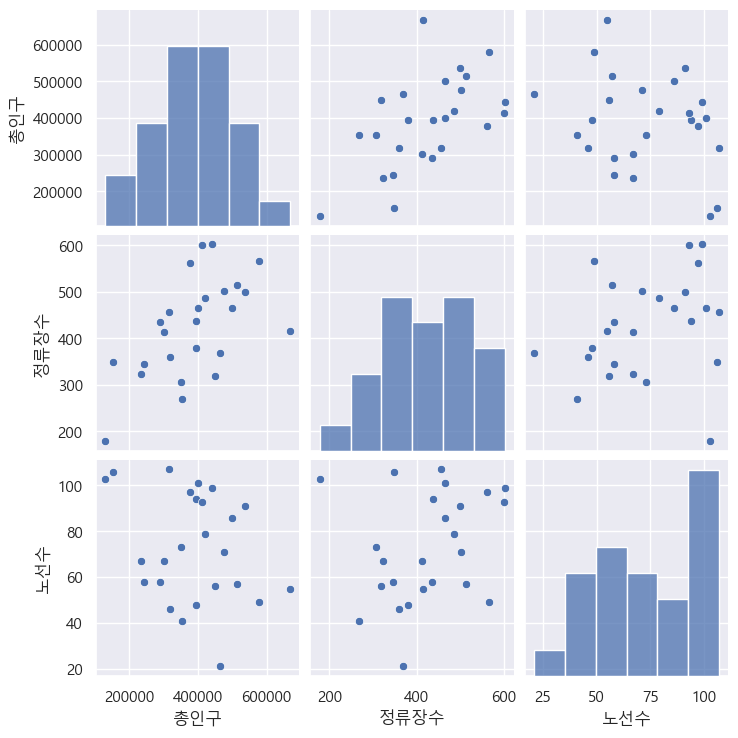

In [35]:
sns.pairplot(df[['총인구','정류장수','노선수']])

### 1)


### 2)

### 3)

## 3.이변량 분석

* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.

* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.


In [36]:
#target = 

### 1)

### 2)

### 3)

### 상관계수를 구하고 HeatMap으로 시각화 후 나름의 분석을 해보세요.



In [37]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.
import scipy.stats as spst

corr = spst.pearsonr(df['인구수'],df['노선수'])
corr

KeyError: '인구수'

In [ ]:
# 아래에 실습코드를 작성하고 상관계수를 확인 및 시각화 합니다.

sns.heatmap(seoul_bus_station.corr(), annot = True)
plt.show()

In [ ]:
# 위 차트를 통해 알게된 사실을 정리해봅시다.
# 1. 
# 2.
# 3.

## 4.관계 정리

In [38]:
x_list = df.columns
y_list = df.columns

In [39]:
corr_list = 0
corr_list = pd.DataFrame(columns = ['독립변수','종속변수','상관계수','검정결과'])

In [40]:
for x in x_list:
    for y in y_list:
        #print(x, y)
        X = df[x] #독립변수 배열
        Y = df[y] #종속변수 배열
        #데이터 타입이 str 이면 계산할 수 없기 때문에 스킵해줍시다.
        if(type(X[0])== str):
            continue
        if(type(Y[0])== str):
            continue
        stat, p = stats.pearsonr(X,Y)
        
        #소수점 아래 3자리 까지 표기하고, 나머지는 반올림합니다.
        stat = round(stat,3)
        p = round(p,3)
        #p-value 가 0.05보다 작은 것만 남깁니다. corr_list에 저장합니다. if문을 지우면 모든 결과를 저장할 수 있습니다.
        if(p < 0.05):
            temp = [(x,y,stat,p)]
            temp = pd.DataFrame(temp,columns = ['독립변수','종속변수','상관계수','검정결과'])
            corr_list = pd.concat([corr_list,temp],ignore_index=True)
            #print("________________")
            #print("독립변수: ", x," 종속변수: ",y)
            #print(stat, p)

In [41]:
# 위의 corr_list를 더 보기 좋게만들어 줄 corr_p를 만들어 줍니다.

number_of_columns = 40 #이 값은 본인의 데이터프레임의 열 개수(데이터 타입이 str인 열을 제외한) 만큼으로 설정하면 됩니다.
corr_p = pd.DataFrame(index=range(0,number_of_columns),columns=df.columns) 
corr_p = corr_p.drop(columns = ['자치구'],axis =1) #데이터 타입이 str 인 열을 제거해야 합니다.

In [42]:
# 인덱스를 만들어 줍니다.
index_name = corr_p.columns
corr_p['index'] = index_name
corr_p = corr_p.set_index('index')

In [43]:
# 이제 corr_p에 아까 계산했던 corr_list에 있는 값들을 맵핑해줍니다.
for column in corr_p.columns:
    for index in corr_p.index:
        #아주 길고 괴랄한 코드인데, 그냥 실행하면 될 거에요 (아마도)
        corr_p[index][column] = corr_list.loc[(corr_list['독립변수'] == index)].loc[(corr_list['종속변수']==column)][['상관계수','검정결과']].values.tolist()

In [44]:
corr_p

,총인구,총남자수,총여자수,총한국인수,한국남자수,한국여자수,총외국인수,외국남자수,외국여자수,65세이상고령자,...,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,각구별평균이동시간,각구별이동시간의합,각구별평균이동인구,각구별이동인구의합
index,,,,,,,,,,,,,,,,,,,,,
총인구,"[[1.0, 0.0]]","[[0.999, 0.0]]","[[0.999, 0.0]]","[[0.999, 0.0]]","[[0.999, 0.0]]","[[0.997, 0.0]]",[],[],[],"[[0.951, 0.0]]",...,"[[0.567, 0.003]]",[],[],[],[],[],"[[0.639, 0.001]]",[],"[[0.696, 0.0]]","[[0.528, 0.007]]"
총남자수,"[[0.999, 0.0]]","[[1.0, 0.0]]","[[0.995, 0.0]]","[[0.996, 0.0]]","[[0.999, 0.0]]","[[0.992, 0.0]]",[],[],[],"[[0.952, 0.0]]",...,"[[0.55, 0.004]]",[],[],[],[],[],"[[0.645, 0.001]]",[],"[[0.681, 0.0]]","[[0.51, 0.009]]"
총여자수,"[[0.999, 0.0]]","[[0.995, 0.0]]","[[1.0, 0.0]]","[[0.999, 0.0]]","[[0.996, 0.0]]","[[0.999, 0.0]]",[],[],[],"[[0.948, 0.0]]",...,"[[0.581, 0.002]]",[],[],[],[],[],"[[0.632, 0.001]]",[],"[[0.708, 0.0]]","[[0.544, 0.005]]"
총한국인수,"[[0.999, 0.0]]","[[0.996, 0.0]]","[[0.999, 0.0]]","[[1.0, 0.0]]","[[0.999, 0.0]]","[[0.999, 0.0]]",[],[],[],"[[0.953, 0.0]]",...,"[[0.564, 0.003]]",[],[],[],[],[],"[[0.654, 0.0]]",[],"[[0.701, 0.0]]","[[0.529, 0.007]]"
한국남자수,"[[0.999, 0.0]]","[[0.999, 0.0]]","[[0.996, 0.0]]","[[0.999, 0.0]]","[[1.0, 0.0]]","[[0.995, 0.0]]",[],[],[],"[[0.956, 0.0]]",...,"[[0.548, 0.005]]",[],[],[],[],[],"[[0.659, 0.0]]",[],"[[0.686, 0.0]]","[[0.511, 0.009]]"
한국여자수,"[[0.997, 0.0]]","[[0.992, 0.0]]","[[0.999, 0.0]]","[[0.999, 0.0]]","[[0.995, 0.0]]","[[1.0, 0.0]]",[],[],[],"[[0.949, 0.0]]",...,"[[0.577, 0.003]]",[],[],[],[],[],"[[0.648, 0.0]]",[],"[[0.713, 0.0]]","[[0.545, 0.005]]"
총외국인수,[],[],[],[],[],[],"[[1.0, 0.0]]","[[0.978, 0.0]]","[[0.973, 0.0]]",[],...,[],[],[],[],"[[0.434, 0.03]]","[[0.455, 0.022]]","[[-0.477, 0.016]]",[],[],[]
외국남자수,[],[],[],[],[],[],"[[0.978, 0.0]]","[[1.0, 0.0]]","[[0.902, 0.0]]",[],...,[],[],[],[],"[[0.402, 0.046]]","[[0.412, 0.04]]","[[-0.404, 0.045]]",[],[],[]
외국여자수,[],[],[],[],[],[],"[[0.973, 0.0]]","[[0.902, 0.0]]","[[1.0, 0.0]]",[],...,[],"[[0.43, 0.032]]",[],[],"[[0.446, 0.025]]","[[0.479, 0.015]]","[[-0.533, 0.006]]",[],[],[]


In [45]:
corr_p.to_csv("df_corr_p.csv", encoding='cp949', index = True)

In [46]:
corr_list2 = 0
corr_list2 = pd.DataFrame(columns = ['독립변수','종속변수','상관계수','검정결과'])

In [47]:
for x in x_list:
    for y in y_list:
        #print(x, y)
        X = df[x] #독립변수 배열
        Y = df[y] #종속변수 배열
        #데이터 타입이 str 이면 계산할 수 없기 때문에 스킵해줍시다.
        if(type(X[0])== str):
            continue
        if(type(Y[0])== str):
            continue
        stat, p = stats.spearmanr(X,Y)
        
        #소수점 아래 3자리 까지 표기하고, 나머지는 반올림합니다.
        stat = round(stat,3)
        p = round(p,3)
        #p-value 가 0.05보다 작은 것만 남깁니다. corr_list에 저장합니다. if문을 지우면 모든 결과를 저장할 수 있습니다.
        if(p < 0.05):
            temp = [(x,y,stat,p)]
            temp = pd.DataFrame(temp,columns = ['독립변수','종속변수','상관계수','검정결과'])
            corr_list2 = pd.concat([corr_list2,temp],ignore_index=True)
            #print("________________")
            #print("독립변수: ", x," 종속변수: ",y)
            #print(stat, p)

In [48]:
# 위의 corr_list를 더 보기 좋게만들어 줄 corr_p를 만들어 줍니다.

number_of_columns = 40 #이 값은 본인의 데이터프레임의 열 개수(데이터 타입이 str인 열을 제외한) 만큼으로 설정하면 됩니다.
corr_p2 = pd.DataFrame(index=range(0,number_of_columns),columns=df.columns) 
corr_p2 = corr_p2.drop(columns = ['자치구'],axis =1) #데이터 타입이 str 인 열을 제거해야 합니다.

In [49]:
# 인덱스를 만들어 줍니다.
index_name = corr_p2.columns
corr_p2['index'] = index_name
corr_p2 = corr_p2.set_index('index')

In [50]:
# 이제 corr_p에 아까 계산했던 corr_list에 있는 값들을 맵핑해줍니다.
for column in corr_p2.columns:
    for index in corr_p2.index:
        #아주 길고 괴랄한 코드인데, 그냥 실행하면 될 거에요 (아마도)
        corr_p2[index][column] = corr_list2.loc[(corr_list2['독립변수'] == index)].loc[(corr_list2['종속변수']==column)][['상관계수','검정결과']].values.tolist()

In [51]:
corr_p2

,총인구,총남자수,총여자수,총한국인수,한국남자수,한국여자수,총외국인수,외국남자수,외국여자수,65세이상고령자,...,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,각구별평균이동시간,각구별이동시간의합,각구별평균이동인구,각구별이동인구의합
index,,,,,,,,,,,,,,,,,,,,,
총인구,"[[1.0, 0.0]]","[[0.996, 0.0]]","[[0.995, 0.0]]","[[0.996, 0.0]]","[[0.995, 0.0]]","[[0.993, 0.0]]",[],[],[],"[[0.932, 0.0]]",...,"[[0.591, 0.002]]",[],[],[],[],[],"[[0.635, 0.001]]",[],"[[0.735, 0.0]]","[[0.495, 0.012]]"
총남자수,"[[0.996, 0.0]]","[[1.0, 0.0]]","[[0.988, 0.0]]","[[0.992, 0.0]]","[[0.993, 0.0]]","[[0.985, 0.0]]",[],[],[],"[[0.933, 0.0]]",...,"[[0.571, 0.003]]",[],[],[],[],[],"[[0.63, 0.001]]",[],"[[0.729, 0.0]]","[[0.492, 0.013]]"
총여자수,"[[0.995, 0.0]]","[[0.988, 0.0]]","[[1.0, 0.0]]","[[0.993, 0.0]]","[[0.992, 0.0]]","[[0.995, 0.0]]",[],[],[],"[[0.919, 0.0]]",...,"[[0.624, 0.001]]",[],"[[0.41, 0.042]]","[[0.422, 0.036]]",[],[],"[[0.606, 0.001]]",[],"[[0.748, 0.0]]","[[0.528, 0.007]]"
총한국인수,"[[0.996, 0.0]]","[[0.992, 0.0]]","[[0.993, 0.0]]","[[1.0, 0.0]]","[[0.998, 0.0]]","[[0.997, 0.0]]",[],[],[],"[[0.933, 0.0]]",...,"[[0.586, 0.002]]",[],[],[],[],[],"[[0.654, 0.0]]",[],"[[0.726, 0.0]]","[[0.482, 0.015]]"
한국남자수,"[[0.995, 0.0]]","[[0.993, 0.0]]","[[0.992, 0.0]]","[[0.998, 0.0]]","[[1.0, 0.0]]","[[0.995, 0.0]]",[],[],[],"[[0.933, 0.0]]",...,"[[0.578, 0.002]]",[],[],[],[],[],"[[0.652, 0.0]]",[],"[[0.723, 0.0]]","[[0.485, 0.014]]"
한국여자수,"[[0.993, 0.0]]","[[0.985, 0.0]]","[[0.995, 0.0]]","[[0.997, 0.0]]","[[0.995, 0.0]]","[[1.0, 0.0]]",[],[],[],"[[0.929, 0.0]]",...,"[[0.595, 0.002]]",[],[],[],[],[],"[[0.642, 0.001]]",[],"[[0.725, 0.0]]","[[0.485, 0.014]]"
총외국인수,[],[],[],[],[],[],"[[1.0, 0.0]]","[[0.977, 0.0]]","[[0.977, 0.0]]",[],...,[],"[[0.431, 0.032]]",[],[],"[[0.405, 0.044]]","[[0.455, 0.022]]","[[-0.549, 0.004]]",[],[],[]
외국남자수,[],[],[],[],[],[],"[[0.977, 0.0]]","[[1.0, 0.0]]","[[0.932, 0.0]]","[[-0.431, 0.032]]",...,[],"[[0.441, 0.027]]",[],[],"[[0.441, 0.027]]","[[0.468, 0.018]]","[[-0.58, 0.002]]",[],[],[]
외국여자수,[],[],[],[],[],[],"[[0.977, 0.0]]","[[0.932, 0.0]]","[[1.0, 0.0]]",[],...,[],"[[0.461, 0.021]]",[],[],[],"[[0.425, 0.034]]","[[-0.542, 0.005]]",[],[],[]


In [52]:
corr_p2.to_csv("df_corr_p2.csv", encoding='cp949', index = True)

In [53]:
pd.read_csv('corr_p.csv', sep=",", encoding = 'UTF-8')

,남자,여자,계,택시운송업,택시운송업.1,한식 일반 음식점업,한식 일반 음식점업.1,용달 화물자동차 운송업,용달 화물자동차 운송업.1,부동산 중개 및 대리업,...,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,유출 평균 이동 시간(분),유출 이동인구(합),유입 평균 이동 시간(분),유입 이동인구(합)
0,"[[1.0, 0.0]]","[[0.99, 0.0]]","[[1.0, 0.0]]","[[0.64, 0.0]]","[[0.61, 0.0]]",[],[],"[[0.64, 0.0]]","[[0.63, 0.0]]","[[0.67, 0.0]]",...,"[[0.55, 0.0]]",[],[],[],[],[],[],[],"[[0.4, 0.05]]",[]
1,"[[0.99, 0.0]]","[[1.0, 0.0]]","[[1.0, 0.0]]","[[0.63, 0.0]]","[[0.6, 0.0]]",[],[],"[[0.6, 0.0]]","[[0.59, 0.0]]","[[0.7, 0.0]]",...,"[[0.58, 0.0]]",[],[],[],[],[],[],[],"[[0.44, 0.03]]",[]
2,"[[1.0, 0.0]]","[[1.0, 0.0]]","[[1.0, 0.0]]","[[0.64, 0.0]]","[[0.61, 0.0]]",[],[],"[[0.62, 0.0]]","[[0.61, 0.0]]","[[0.69, 0.0]]",...,"[[0.57, 0.0]]",[],[],[],[],[],[],[],"[[0.42, 0.03]]",[]
3,"[[0.64, 0.0]]","[[0.63, 0.0]]","[[0.64, 0.0]]","[[1.0, 0.0]]","[[0.97, 0.0]]",[],[],"[[0.81, 0.0]]","[[0.8, 0.0]]",[],...,[],"[[-0.6, 0.0]]",[],[],"[[-0.7, 0.0]]","[[-0.67, 0.0]]",[],[],[],[]
4,"[[0.61, 0.0]]","[[0.6, 0.0]]","[[0.61, 0.0]]","[[0.97, 0.0]]","[[1.0, 0.0]]",[],[],"[[0.83, 0.0]]","[[0.82, 0.0]]",[],...,[],"[[-0.66, 0.0]]",[],[],"[[-0.74, 0.0]]","[[-0.7, 0.0]]",[],"[[-0.41, 0.04]]",[],"[[-0.41, 0.04]]"
5,[],[],[],[],[],"[[1.0, 0.0]]","[[0.98, 0.0]]",[],[],"[[0.7, 0.0]]",...,[],"[[0.4, 0.04]]","[[0.57, 0.0]]","[[0.55, 0.0]]",[],[],"[[0.87, 0.0]]","[[0.9, 0.0]]","[[0.83, 0.0]]","[[0.9, 0.0]]"
6,[],[],[],[],[],"[[0.98, 0.0]]","[[1.0, 0.0]]","[[-0.41, 0.04]]",[],"[[0.72, 0.0]]",...,[],"[[0.41, 0.04]]","[[0.57, 0.0]]","[[0.54, 0.01]]",[],[],"[[0.86, 0.0]]","[[0.93, 0.0]]","[[0.81, 0.0]]","[[0.93, 0.0]]"
7,"[[0.64, 0.0]]","[[0.6, 0.0]]","[[0.62, 0.0]]","[[0.81, 0.0]]","[[0.83, 0.0]]",[],"[[-0.41, 0.04]]","[[1.0, 0.0]]","[[1.0, 0.0]]",[],...,[],"[[-0.58, 0.0]]",[],[],"[[-0.45, 0.02]]",[],[],"[[-0.48, 0.01]]",[],"[[-0.48, 0.01]]"
8,"[[0.63, 0.0]]","[[0.59, 0.0]]","[[0.61, 0.0]]","[[0.8, 0.0]]","[[0.82, 0.0]]",[],[],"[[1.0, 0.0]]","[[1.0, 0.0]]",[],...,[],"[[-0.57, 0.0]]",[],[],"[[-0.46, 0.02]]",[],[],"[[-0.47, 0.02]]",[],"[[-0.47, 0.02]]"
9,"[[0.67, 0.0]]","[[0.7, 0.0]]","[[0.69, 0.0]]",[],[],"[[0.7, 0.0]]","[[0.72, 0.0]]",[],[],"[[1.0, 0.0]]",...,"[[0.42, 0.03]]",[],"[[0.54, 0.01]]","[[0.52, 0.01]]",[],[],"[[0.66, 0.0]]","[[0.68, 0.0]]","[[0.74, 0.0]]","[[0.68, 0.0]]"


In [54]:
pd.read_csv('df_summary.csv', sep=",", encoding = 'cp949')

,-,정류장수,노선수
0,총인구,"[[0.591, 0.002]]",[]
1,총남자수,"[[0.571, 0.003]]",[]
2,총여자수,"[[0.624, 0.001]]",[]
3,총한국인수,"[[0.586, 0.002]]",[]
4,한국남자수,"[[0.578, 0.002]]",[]
5,한국여자수,"[[0.595, 0.002]]",[]
6,총외국인수,[],"[[0.431, 0.032]]"
7,외국남자수,[],"[[0.441, 0.027]]"
8,외국여자수,[],"[[0.461, 0.021]]"
9,65세이상고령자,"[[0.551, 0.004]]",[]


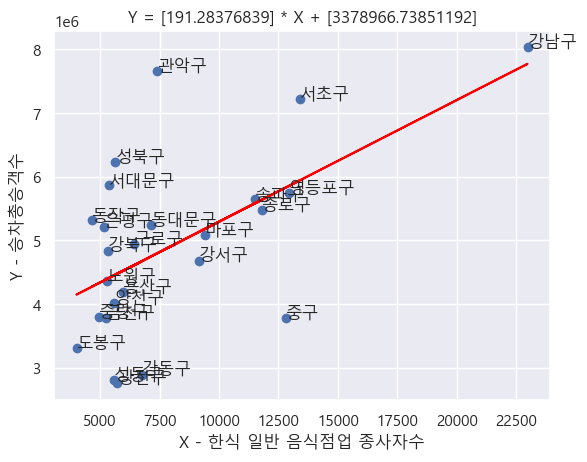

In [55]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
X2 = df['한식 일반 음식점업 종사자수'].values
Y2 = df['승차총승객수'].values
X2 = X2.reshape(-1,1)
Y2 = Y2.reshape(-1,1)
lr2.fit(X2, Y2)

import matplotlib.pyplot as plt
plt.scatter(X2, Y2)
plt.xlabel('X - 한식 일반 음식점업 종사자수')
plt.ylabel('Y - 승차총승객수')
plt.plot(X2,lr2.predict(X2.reshape(-1,1)), color='red')
plt.title('Y = {} * X + {}'.format(lr2.coef_[0], lr2.intercept_))

for n in range(len(df)): # 행 개수만큼 순회
    row = df.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['한식 일반 음식점업 종사자수'] # x좌표가 저장된 열
    y = row['승차총승객수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정
    
plt.show()

In [56]:
import statsmodels.api as sm
results = sm.OLS(Y2, sm.add_constant(X2)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.300
Method:                 Least Squares   F-statistic:                     11.31
Date:                Fri, 11 Nov 2022   Prob (F-statistic):            0.00269
Time:                        09:47:27   Log-Likelihood:                -384.14
No. Observations:                  25   AIC:                             772.3
Df Residuals:                      23   BIC:                             774.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.379e+06   5.14e+05      6.571      0.000    2.32e+06    4.44e+06
x1           191.2838     56.888      3.362      0.003      73.601     308.967
==============================================================================
Omnibus:                        0.998   Durbin-Watson:                   1.867
Prob(Omnibus):                  0.607   Jarque-Bera (JB):                0.391
Skew:                           0.302   Prob(JB):                        0.822
Kurtosis:                       3.104   Cond. No.                     1.95e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

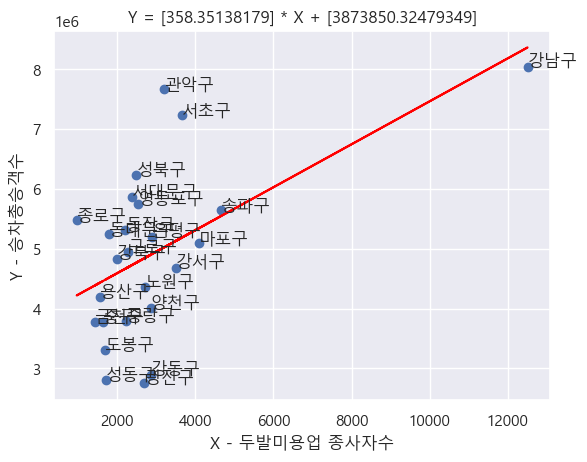

In [57]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
X2 = df['두발미용업 종사자수'].values
Y2 = df['승차총승객수'].values
X2 = X2.reshape(-1,1)
Y2 = Y2.reshape(-1,1)
lr2.fit(X2, Y2)

import matplotlib.pyplot as plt
plt.scatter(X2, Y2)
plt.xlabel('X - 두발미용업 종사자수')
plt.ylabel('Y - 승차총승객수')
plt.plot(X2,lr2.predict(X2.reshape(-1,1)), color='red')
plt.title('Y = {} * X + {}'.format(lr2.coef_[0], lr2.intercept_))

for n in range(len(df)): # 행 개수만큼 순회
    row = df.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['두발미용업 종사자수'] # x좌표가 저장된 열
    y = row['승차총승객수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정
    
plt.show()

In [58]:
import statsmodels.api as sm
results = sm.OLS(Y2, sm.add_constant(X2)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.272
Method:                 Least Squares   F-statistic:                     9.976
Date:                Fri, 11 Nov 2022   Prob (F-statistic):            0.00439
Time:                        09:47:28   Log-Likelihood:                -384.64
No. Observations:                  25   AIC:                             773.3
Df Residuals:                      23   BIC:                             775.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.874e+06   4.08e+05      9.484      0.000    3.03e+06    4.72e+06
x1           358.3514    113.456      3.159      0.004     123.650     593.053
==============================================================================
Omnibus:                        0.329   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.848   Jarque-Bera (JB):                0.347
Skew:                           0.235   Prob(JB):                        0.841
Kurtosis:                       2.665   Cond. No.                     6.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

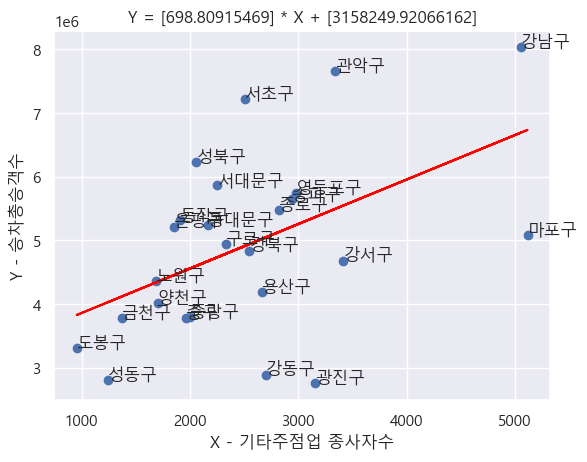

In [59]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
X2 = df['기타주점업 종사자수'].values
Y2 = df['승차총승객수'].values
X2 = X2.reshape(-1,1)
Y2 = Y2.reshape(-1,1)
lr2.fit(X2, Y2)

import matplotlib.pyplot as plt
plt.scatter(X2, Y2)
plt.xlabel('X - 기타주점업 종사자수')
plt.ylabel('Y - 승차총승객수')
plt.plot(X2,lr2.predict(X2.reshape(-1,1)), color='red')
plt.title('Y = {} * X + {}'.format(lr2.coef_[0], lr2.intercept_))

for n in range(len(df)): # 행 개수만큼 순회
    row = df.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['기타주점업 종사자수'] # x좌표가 저장된 열
    y = row['승차총승객수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정
    
plt.show()

In [60]:
import statsmodels.api as sm
results = sm.OLS(Y2, sm.add_constant(X2)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.211
Method:                 Least Squares   F-statistic:                     7.419
Date:                Fri, 11 Nov 2022   Prob (F-statistic):             0.0121
Time:                        09:47:28   Log-Likelihood:                -385.65
No. Observations:                  25   AIC:                             775.3
Df Residuals:                      23   BIC:                             777.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.158e+06   6.92e+05      4.566      0.000    1.73e+06    4.59e+06
x1           698.8092    256.561      2.724      0.012     168.072    1229.546
==============================================================================
Omnibus:                        0.061   Durbin-Watson:                   1.782
Prob(Omnibus):                  0.970   Jarque-Bera (JB):                0.164
Skew:                          -0.098   Prob(JB):                        0.921
Kurtosis:                       2.656   Cond. No.                     7.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

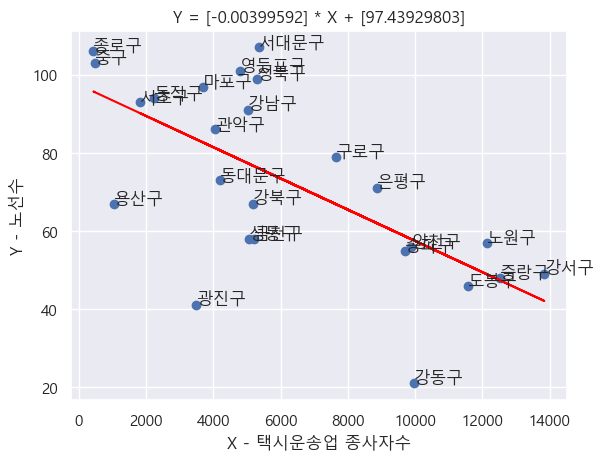

In [61]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
X2 = df['택시운송업 종사자수'].values
Y2 = df['노선수'].values
X2 = X2.reshape(-1,1)
Y2 = Y2.reshape(-1,1)
lr2.fit(X2, Y2)

import matplotlib.pyplot as plt
plt.scatter(X2, Y2)
plt.xlabel('X - 택시운송업 종사자수')
plt.ylabel('Y - 노선수')
plt.plot(X2,lr2.predict(X2.reshape(-1,1)), color='red')
plt.title('Y = {} * X + {}'.format(lr2.coef_[0], lr2.intercept_))

for n in range(len(df)): # 행 개수만큼 순회
    row = df.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['택시운송업 종사자수'] # x좌표가 저장된 열
    y = row['노선수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정
    
plt.show()

In [62]:
import statsmodels.api as sm
results = sm.OLS(Y2, sm.add_constant(X2)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     17.66
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           0.000341
Time:                        09:47:29   Log-Likelihood:                -107.09
No. Observations:                  25   AIC:                             218.2
Df Residuals:                      23   BIC:                             220.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.4393      6.887     14.147      0.000      83.192     111.687
x1            -0.0040      0.001     -4.202      0.000      -0.006      -0.002
==============================================================================
Omnibus:                        3.179   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.204   Jarque-Bera (JB):                2.106
Skew:                          -0.708   Prob(JB):                        0.349
Kurtosis:                       3.118   Cond. No.                     1.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

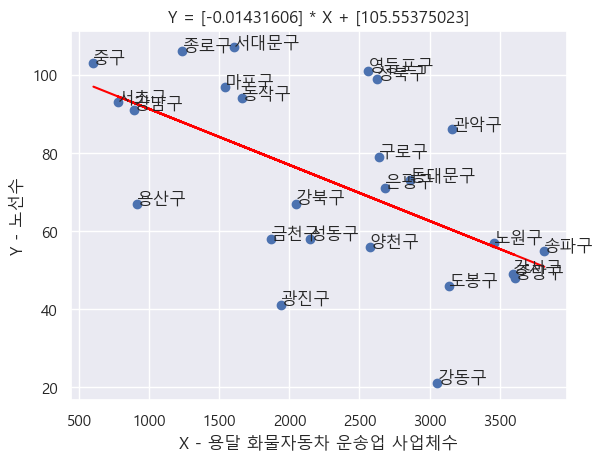

In [63]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = df['용달 화물자동차 운송업 사업체수'].values
Y = df['노선수'].values
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
lr.fit(X, Y)

import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.xlabel('X - 용달 화물자동차 운송업 사업체수')
plt.ylabel('Y - 노선수')
plt.plot(X,lr.predict(X.reshape(-1,1)), color='red')
plt.title('Y = {} * X + {}'.format(lr.coef_[0], lr.intercept_))

for n in range(len(df)): # 행 개수만큼 순회
    row = df.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['용달 화물자동차 운송업 사업체수'] # x좌표가 저장된 열
    y = row['노선수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정
    
plt.show()

In [64]:
import statsmodels.api as sm
results = sm.OLS(Y, sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     11.43
Date:                Fri, 11 Nov 2022   Prob (F-statistic):            0.00258
Time:                        09:47:29   Log-Likelihood:                -109.17
No. Observations:                  25   AIC:                             222.3
Df Residuals:                      23   BIC:                             224.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        105.5538     10.440     10.110      0.000      83.957     127.151
x1            -0.0143      0.004     -3.380      0.003      -0.023      -0.006
==============================================================================
Omnibus:                        0.468   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.791   Jarque-Bera (JB):                0.547
Skew:                          -0.275   Prob(JB):                        0.761
Kurtosis:                       2.527   Cond. No.                     6.47e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

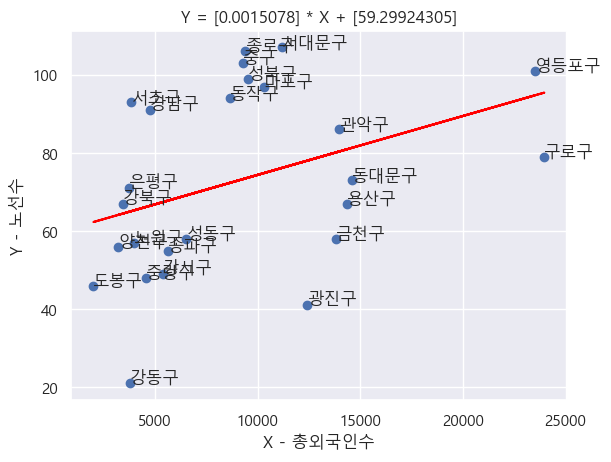

In [65]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
X2 = df['총외국인수'].values
Y2 = df['노선수'].values
X2 = X2.reshape(-1,1)
Y2 = Y2.reshape(-1,1)
lr2.fit(X2, Y2)

import matplotlib.pyplot as plt
plt.scatter(X2, Y2)
plt.xlabel('X - 총외국인수')
plt.ylabel('Y - 노선수')
plt.plot(X2,lr2.predict(X2.reshape(-1,1)), color='red')
plt.title('Y = {} * X + {}'.format(lr2.coef_[0], lr2.intercept_))

for n in range(len(df)): # 행 개수만큼 순회
    row = df.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['총외국인수'] # x좌표가 저장된 열
    y = row['노선수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정
    
plt.show()

In [66]:
import statsmodels.api as sm
results = sm.OLS(Y2, sm.add_constant(X2)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     3.803
Date:                Fri, 11 Nov 2022   Prob (F-statistic):             0.0635
Time:                        09:47:29   Log-Likelihood:                -112.30
No. Observations:                  25   AIC:                             228.6
Df Residuals:                      23   BIC:                             231.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.2992      8.312      7.134      0.000      42.105      76.494
x1             0.0015      0.001      1.950      0.063   -9.17e-05       0.003
==============================================================================
Omnibus:                        1.740   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                1.023
Skew:                          -0.045   Prob(JB):                        0.600
Kurtosis:                       2.013   Cond. No.                     1.98e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

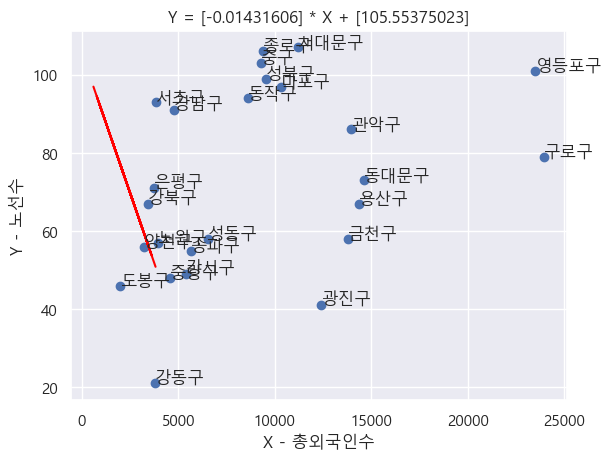

In [67]:
from sklearn.linear_model import LinearRegression
lr2 = LinearRegression()
X2 = df['총외국인수'].values
Y2 = df['노선수'].values
X2 = X2.reshape(-1,1)
Y2 = Y2.reshape(-1,1)
lr2.fit(X, Y)

import matplotlib.pyplot as plt
plt.scatter(X2, Y2)
plt.xlabel('X - 총외국인수')
plt.ylabel('Y - 노선수')
plt.plot(X,lr.predict(X.reshape(-1,1)), color='red')
plt.title('Y = {} * X + {}'.format(lr.coef_[0], lr.intercept_))

for n in range(len(df)): # 행 개수만큼 순회
    row = df.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['총외국인수'] # x좌표가 저장된 열
    y = row['노선수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정
    
plt.show()

In [68]:
import statsmodels.api as sm
results = sm.OLS(Y2, sm.add_constant(X2)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     3.803
Date:                Fri, 11 Nov 2022   Prob (F-statistic):             0.0635
Time:                        09:47:29   Log-Likelihood:                -112.30
No. Observations:                  25   AIC:                             228.6
Df Residuals:                      23   BIC:                             231.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         59.2992      8.312      7.134      0.000      42.105      76.494
x1             0.0015      0.001      1.950      0.063   -9.17e-05       0.003
==============================================================================
Omnibus:                        1.740   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.419   Jarque-Bera (JB):                1.023
Skew:                          -0.045   Prob(JB):                        0.600
Kurtosis:                       2.013   Cond. No.                     1.98e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.98e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

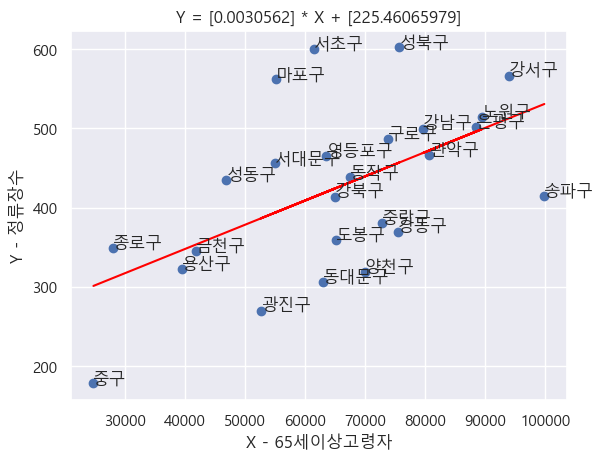

In [69]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = df['65세이상고령자'].values
Y = df['정류장수'].values
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
lr.fit(X, Y)

import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.xlabel('X - 65세이상고령자')
plt.ylabel('Y - 정류장수')
plt.plot(X,lr.predict(X.reshape(-1,1)), color='red')
plt.title('Y = {} * X + {}'.format(lr.coef_[0], lr.intercept_))

for n in range(len(df)): # 행 개수만큼 순회
    row = df.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['65세이상고령자'] # x좌표가 저장된 열
    y = row['정류장수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정
    
plt.show()

In [70]:
import statsmodels.api as sm
results = sm.OLS(Y, sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     10.21
Date:                Fri, 11 Nov 2022   Prob (F-statistic):            0.00403
Time:                        09:47:30   Log-Likelihood:                -147.02
No. Observations:                  25   AIC:                             298.0
Df Residuals:                      23   BIC:                             300.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        225.4607     64.896      3.474      0.002      91.212     359.709
x1             0.0031      0.001      3.195      0.004       0.001       0.005
==============================================================================
Omnibus:                        0.757   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.685   Jarque-Bera (JB):                0.756
Skew:                           0.356   Prob(JB):                        0.685
Kurtosis:                       2.532   Cond. No.                     2.44e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.44e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [71]:
df4 = df.drop(df.index[[0,16,17]])
df4

,자치구,총인구,총남자수,총여자수,총한국인수,한국남자수,한국여자수,총외국인수,외국남자수,외국여자수,...,정류장수,노선수,승차총승객수,하차총승객수,승차평균승객수,하차평균승객수,각구별평균이동시간,각구별이동시간의합,각구별평균이동인구,각구별이동인구의합
1,종로구,153684,74018,79666,144275,69911,74364,9409,4107,5302,...,349,106,5468935,5205394,131.889620,125.534028,21.349599,9356120,44.203753,19371587.60
2,용산구,236518,114571,121947,222169,106735,115434,14349,7836,6513,...,323,67,4189977,4086474,137.891694,134.485421,21.364786,8514380,36.868280,14692894.37
3,금천구,244901,123959,120942,231098,116568,114530,13803,7391,6412,...,345,58,3776658,3581930,123.098370,116.751304,23.998944,6362000,30.547876,8098089.24
4,성동구,291609,141662,149947,285073,138847,146226,6536,2815,3721,...,435,58,2807280,2746738,96.377369,94.298888,21.740324,8887140,42.650995,17435129.45
5,강북구,300824,145934,154890,297384,144643,152741,3440,1291,2149,...,413,67,4825181,4671783,133.020373,128.791504,23.811274,7649610,39.083595,12555995.80
6,서대문구,317075,149805,167270,305866,145958,159908,11209,3847,7362,...,456,107,5863499,5796960,109.914502,108.667192,22.026816,8465390,42.378435,16286964.89
7,도봉구,318100,154440,163660,316098,153716,162382,2002,724,1278,...,359,46,3304305,3211421,106.859356,103.855540,24.489976,6995880,37.834944,10808043.75
8,동대문구,352592,172318,180274,337982,166823,171159,14610,5495,9115,...,306,73,5240565,5115379,131.841430,128.692017,21.673451,8838130,39.906645,16273371.28
9,광진구,353110,169525,183585,340707,164346,176361,12403,5179,7224,...,269,41,2749448,2753411,118.352546,118.523137,22.474283,8625540,46.725608,17933101.49
10,마포구,378629,176886,201743,368331,173073,195258,10298,3813,6485,...,562,97,5088461,4957596,103.907639,101.235343,22.044201,9494790,54.853590,23626318.80


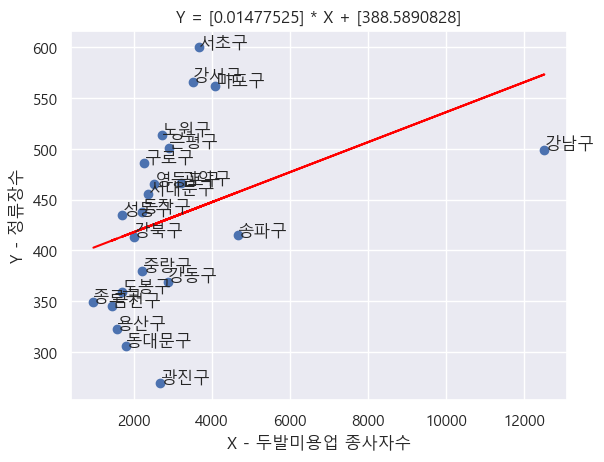

In [72]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = df4['두발미용업 종사자수'].values
Y = df4['정류장수'].values
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
lr.fit(X, Y)

import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.xlabel('X - 두발미용업 종사자수')
plt.ylabel('Y - 정류장수')
plt.plot(X,lr.predict(X.reshape(-1,1)), color='red')
plt.title('Y = {} * X + {}'.format(lr.coef_[0], lr.intercept_))

for n in range(len(df4)): # 행 개수만큼 순회
    row = df4.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['두발미용업 종사자수'] # x좌표가 저장된 열
    y = row['정류장수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정
    
plt.show()

In [73]:
import statsmodels.api as sm
results = sm.OLS(Y, sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     3.459
Date:                Fri, 11 Nov 2022   Prob (F-statistic):             0.0777
Time:                        09:47:30   Log-Likelihood:                -127.70
No. Observations:                  22   AIC:                             259.4
Df Residuals:                      20   BIC:                             261.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        388.5891     29.676     13.094      0.000     326.685     450.493
x1             0.0148      0.008      1.860      0.078      -0.002       0.031
==============================================================================
Omnibus:                        0.462   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.794   Jarque-Bera (JB):                0.566
Skew:                           0.113   Prob(JB):                        0.753
Kurtosis:                       2.247   Cond. No.                     6.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

IndexError: single positional indexer is out-of-bounds

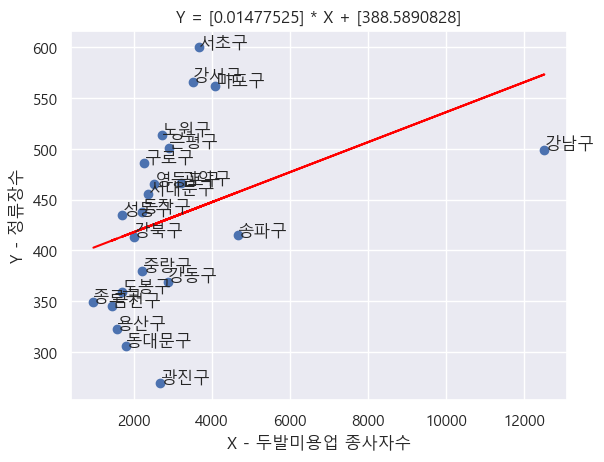

In [74]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = df4['두발미용업 종사자수'].values
Y = df4['정류장수'].values
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
lr.fit(X, Y)

import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.xlabel('X - 두발미용업 종사자수')
plt.ylabel('Y - 정류장수')
plt.plot(X,lr.predict(X.reshape(-1,1)), color='red')
plt.title('Y = {} * X + {}'.format(lr.coef_[0], lr.intercept_))

for n in range(len(df)): # 행 개수만큼 순회
    row = df4.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['두발미용업 종사자수'] # x좌표가 저장된 열
    y = row['정류장수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정
    
plt.show()

In [75]:
import statsmodels.api as sm
results = sm.OLS(Y, sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     3.459
Date:                Fri, 11 Nov 2022   Prob (F-statistic):             0.0777
Time:                        09:48:15   Log-Likelihood:                -127.70
No. Observations:                  22   AIC:                             259.4
Df Residuals:                      20   BIC:                             261.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        388.5891     29.676     13.094      0.000     326.685     450.493
x1             0.0148      0.008      1.860      0.078      -0.002       0.031
==============================================================================
Omnibus:                        0.462   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.794   Jarque-Bera (JB):                0.566
Skew:                           0.113   Prob(JB):                        0.753
Kurtosis:                       2.247   Cond. No.                     6.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

IndexError: single positional indexer is out-of-bounds

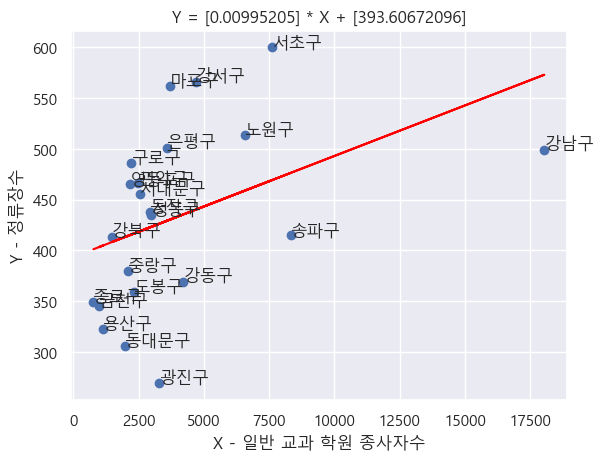

In [76]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = df4['일반 교과 학원 종사자수'].values
Y = df4['정류장수'].values
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
lr.fit(X, Y)

import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.xlabel('X - 일반 교과 학원 종사자수')
plt.ylabel('Y - 정류장수')
plt.plot(X,lr.predict(X.reshape(-1,1)), color='red')
plt.title('Y = {} * X + {}'.format(lr.coef_[0], lr.intercept_))

for n in range(len(df)): # 행 개수만큼 순회
    row = df4.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['일반 교과 학원 종사자수'] # x좌표가 저장된 열
    y = row['정류장수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정
    
plt.show()

In [77]:
import statsmodels.api as sm
results = sm.OLS(Y, sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     4.256
Date:                Fri, 11 Nov 2022   Prob (F-statistic):             0.0523
Time:                        09:48:16   Log-Likelihood:                -127.33
No. Observations:                  22   AIC:                             258.7
Df Residuals:                      20   BIC:                             260.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        393.6067     25.843     15.231      0.000     339.699     447.514
x1             0.0100      0.005      2.063      0.052      -0.000       0.020
==============================================================================
Omnibus:                        0.911   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.634   Jarque-Bera (JB):                0.742
Skew:                           0.043   Prob(JB):                        0.690
Kurtosis:                       2.105   Cond. No.                     7.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

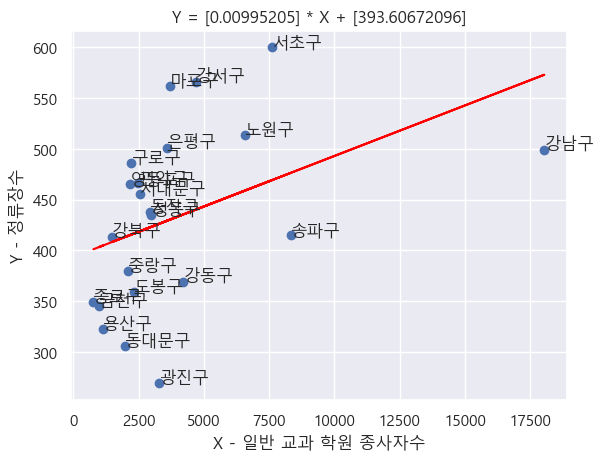

In [78]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
X = df4['일반 교과 학원 종사자수'].values
Y = df4['정류장수'].values
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
lr.fit(X, Y)

import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.xlabel('X - 일반 교과 학원 종사자수')
plt.ylabel('Y - 정류장수')
plt.plot(X,lr.predict(X.reshape(-1,1)), color='red')
plt.title('Y = {} * X + {}'.format(lr.coef_[0], lr.intercept_))

for n in range(len(df4)): # 행 개수만큼 순회
    row = df4.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['일반 교과 학원 종사자수'] # x좌표가 저장된 열
    y = row['정류장수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정
    
plt.show()

In [79]:
import statsmodels.api as sm
results = sm.OLS(Y, sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     4.256
Date:                Fri, 11 Nov 2022   Prob (F-statistic):             0.0523
Time:                        09:48:21   Log-Likelihood:                -127.33
No. Observations:                  22   AIC:                             258.7
Df Residuals:                      20   BIC:                             260.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        393.6067     25.843     15.231      0.000     339.699     447.514
x1             0.0100      0.005      2.063      0.052      -0.000       0.020
==============================================================================
Omnibus:                        0.911   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.634   Jarque-Bera (JB):                0.742
Skew:                           0.043   Prob(JB):                        0.690
Kurtosis:                       2.105   Cond. No.                     7.84e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.84e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [81]:
X = df['택시운송업 종사자수'].values
X

array([  470,   430,  1046,  5196,  5054,  5178,  5354, 11566,  4186,
        3488,  3676, 12524,  2230,  4794,  1806,  7634,  5286,  9884,
        9960,  8860,  4054, 12148,  5034, 13844,  9700], dtype=int64)

In [82]:
Y = df['노선수'].values
Y

array([103, 106,  67,  58,  58,  67, 107,  46,  73,  41,  97,  48,  94,
       101,  93,  79,  99,  56,  21,  71,  86,  57,  91,  49,  55],
      dtype=int64)

In [103]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)

In [84]:
lr.fit(X, Y)

LinearRegression()

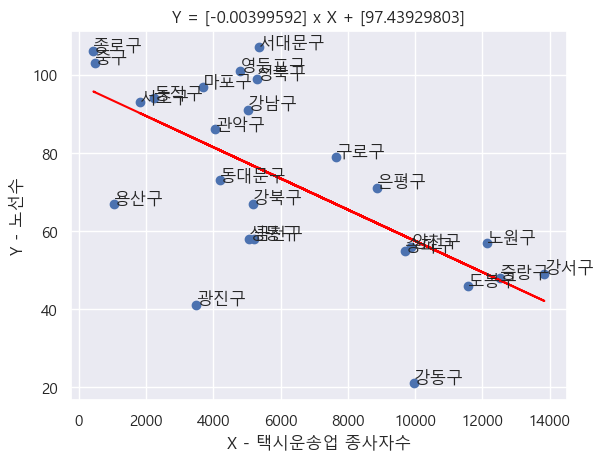

In [85]:
import matplotlib.pyplot as plt
plt.scatter(X, Y)
plt.xlabel('X - 택시운송업 종사자수')
plt.ylabel('Y - 노선수')
plt.plot(X,lr.predict(X.reshape(-1,1)), color='red')
plt.title('Y = {} x X + {}'.format(lr.coef_[0], lr.intercept_))

for n in range(len(df)): # 행 개수만큼 순회
    row = df.iloc[n] # 한 행씩 꺼내기
    name = row['자치구'] # 이름이 저장된 열
    x = row['택시운송업 종사자수'] # x좌표가 저장된 열
    y = row['노선수'] # y좌표가 저장된 열

    plt.text(x, y, name) # x 좌표, y좌표, 이름 순서로 input 지정
    
plt.show()

In [86]:
import statsmodels.api as sm
results = sm.OLS(Y, sm.add_constant(X)).fit()

In [87]:
results.summary()
#https://ordo.tistory.com/103

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.434
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     17.66
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           0.000341
Time:                        09:48:30   Log-Likelihood:                -107.09
No. Observations:                  25   AIC:                             218.2
Df Residuals:                      23   BIC:                             220.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         97.4393      6.887     14.147      0.000      83.192     111.687
x1            -0.0040      0.001     -4.202      0.000      -0.006      -0.002
==============================================================================
Omnibus:                        3.179   Durbin-Watson:                   1.833
Prob(Omnibus):                  0.204   Jarque-Bera (JB):                2.106
Skew:                          -0.708   Prob(JB):                        0.349
Kurtosis:                       3.118   Cond. No.                     1.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
X2 = df['부동산 중개 및 대리업 사업체수'].values
X2

array([1152, 1098, 1582, 1342, 1602, 1178, 1334, 1030, 1684, 1742, 2298,
       1476, 1766, 1972, 2914, 1578, 1692, 1844, 2376, 2268, 2020, 1428,
       4674, 2622, 3354], dtype=int64)

In [89]:
Y2 = df['각구별평균이동인구'].values
Y2

array([44.48448705, 44.20375325, 36.86827988, 30.5478762 , 42.65099453,
       39.08359522, 42.37843498, 37.8349445 , 39.90664535, 46.72560811,
       54.85358984, 40.96864677, 40.95323465, 56.38430073, 64.1075933 ,
       41.699255  , 45.77946837, 46.50061945, 64.20353206, 50.21406097,
       49.86416184, 55.14421883, 90.19978825, 58.40746565, 83.46010667])

In [90]:
X2 = X2.reshape(-1,1)
Y2 = Y2.reshape(-1,1)

In [91]:
lr.fit(X2, Y2)

LinearRegression()

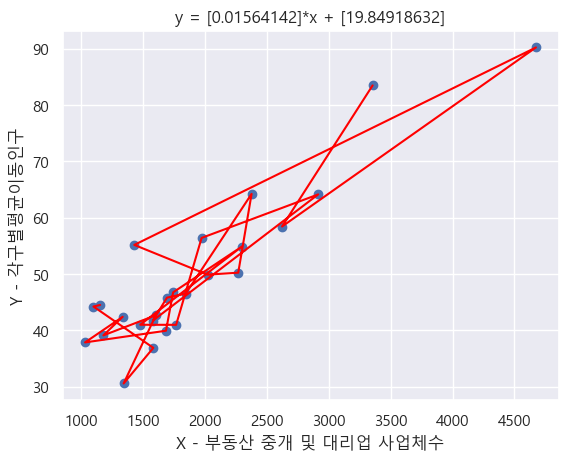

In [92]:
import matplotlib.pyplot as plt
plt.scatter(X2, Y2)
plt.title("부동산 사업체수-구별평균이동인구")
plt.xlabel('X - 부동산 중개 및 대리업 사업체수')
plt.ylabel('Y - 각구별평균이동인구')
plt.plot(X2, Y2, color='red')
plt.title('y = {}*x + {}'.format(lr.coef_[0], lr.intercept_))
plt.show()

In [93]:
import statsmodels.api as sm
results = sm.OLS(Y2, sm.add_constant(X2)).fit()

In [94]:
results.summary()
#https://ordo.tistory.com/103

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     112.3
Date:                Fri, 11 Nov 2022   Prob (F-statistic):           2.53e-10
Time:                        09:48:35   Log-Likelihood:                -78.689
No. Observations:                  25   AIC:                             161.4
Df Residuals:                      23   BIC:                             163.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8492      3.069      6.468      0.000      13.501      26.198
x1             0.0156      0.001     10.598      0.000       0.013       0.019
==============================================================================
Omnibus:                        1.819   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.403   Jarque-Bera (JB):                1.321
Skew:                           0.556   Prob(JB):                        0.516
Kurtosis:                       2.822   Cond. No.                     5.43e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.43e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [98]:
df.columns

Index(['자치구', '총인구', '총남자수', '총여자수', '총한국인수', '한국남자수', '한국여자수', '총외국인수',
       '외국남자수', '외국여자수', '65세이상고령자', '택시운송업 사업체수', '택시운송업 종사자수',
       '한식 일반 음식점업 사업체수', '한식 일반 음식점업 종사자수', '용달 화물자동차 운송업 사업체수',
       '용달 화물자동차 운송업 종사자수', '부동산 중개 및 대리업 사업체수', '부동산 중개 및 대리업 종사자수',
       '두발미용업 사업체수', '두발미용업 종사자수', '커피전문점 사업체수', '커피전문점 종사자수',
       '남녀용 겉옷 및 셔츠 도매업 사업체수', '남녀용 겉옷 및 셔츠 도매업 종사자수', '기타주점업 사업체수',
       '기타주점업 종사자수', '일반 교과 학원 사업체수', '일반 교과 학원 종사자수', '한식 육류요리 전문점 사업체수',
       '한식 육류요리 전문점 종사자수', '정류장수', '노선수', '승차총승객수', '하차총승객수', '승차평균승객수',
       '하차평균승객수', '각구별평균이동시간', '각구별이동시간의합', '각구별평균이동인구', '각구별이동인구의합'],
      dtype='object')

In [113]:
Y = df['노선수'].values
Y

array([103, 106,  67,  58,  58,  67, 107,  46,  73,  41,  97,  48,  94,
       101,  93,  79,  99,  56,  21,  71,  86,  57,  91,  49,  55],
      dtype=int64)

In [114]:
X = df.loc[:,['택시운송업 종사자수',
              '두발미용업 종사자수',
              '총외국인수']].values
X

array([[  470,  1632,  9277],
       [  430,   960,  9409],
       [ 1046,  1554, 14349],
       [ 5196,  1430, 13803],
       [ 5054,  1702,  6536],
       [ 5178,  1994,  3440],
       [ 5354,  2370, 11209],
       [11566,  1694,  2002],
       [ 4186,  1782, 14610],
       [ 3488,  2674, 12403],
       [ 3676,  4084, 10298],
       [12524,  2216,  4557],
       [ 2230,  2210,  8632],
       [ 4794,  2522, 23501],
       [ 1806,  3664,  3854],
       [ 7634,  2268, 23967],
       [ 5286,  2490,  9530],
       [ 9884,  2856,  3196],
       [ 9960,  2858,  3797],
       [ 8860,  2886,  3754],
       [ 4054,  3208, 13961],
       [12148,  2706,  3959],
       [ 5034, 12510,  4761],
       [13844,  3502,  5380],
       [ 9700,  4656,  5654]], dtype=int64)

In [115]:
#X = X.reshape(-1,1)
#Y = Y.reshape(-1,1)

In [116]:
#lr.fit(X, Y)

In [117]:
import statsmodels.api as sm
results = sm.OLS(Y, sm.add_constant(X)).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     6.550
Date:                Fri, 11 Nov 2022   Prob (F-statistic):            0.00268
Time:                        10:05:39   Log-Likelihood:                -105.96
No. Observations:                  25   AIC:                             219.9
Df Residuals:                      21   BIC:                             224.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         83.0074     12.859      6.455      0.000      56.266     109.748
x1            -0.0037      0.001     -3.521      0.002      -0.006      -0.001
x2             0.0021      0.002      1.175      0.253      -0.002       0.006
x3             0.0007      0.001      1.007      0.325      -0.001       0.002
==============================================================================
Omnibus:                        4.558   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.102   Jarque-Bera (JB):                2.905
Skew:                          -0.796   Prob(JB):                        0.234
Kurtosis:                       3.504   Cond. No.                     4.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)

In [120]:
linear_regression_model = LinearRegression()  # 선형 회귀 모델을 가지고 오고 
linear_regression_model.fit(X_train, y_train)  # 학습 데이터를 이용해서 모델을 학습 시킨다

LinearRegression()

In [121]:
y_test_predict = linear_regression_model.predict(X_test)  # 학습시킨 모델로 예측


In [123]:
from sklearn.metrics import mean_squared_error

# 평균 제곱 오차의 루트를 통해서 테스트 데이터에서의 모델 성능 판단
mse = mean_squared_error(y_test, y_test_predict)

mse ** 0.5

21.604408724380615

### 1) 강한 관계의 변수

### 2) 약한 관계의 변수

## 5.솔루션 도출

### 어느 구에 버스 노선 또는 정류장이 제일 필요한가요? 그 이유는?